---
title: "Exploratory Data Analysis"
format:
    html: 
        code-fold: false
---

<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

{{< include instructions.qmd >}} 

# Code 

Provide the source code used for this section of the project here.

If you're using a package for code organization, you can import it at this point. However, make sure that the **actual workflow steps**—including data processing, analysis, and other key tasks—are conducted and clearly demonstrated on this page. The goal is to show the technical flow of your project, highlighting how the code is executed to achieve your results.

If relevant, link to additional documentation or external references that explain any complex components. This section should give readers a clear view of how the project is implemented from a technical perspective.

Remember, this page is a technical narrative, NOT just a notebook with a collection of code cells, include in-line Prose, to describe what is going on.

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import re
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk import download
import string
from scipy.stats import ttest_ind, mannwhitneyu
import numpy as np
import networkx as nx
import math
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr

In [198]:
# Load the CSV file
file_path = '../../data/processed-data/merged_data.csv'
data = pd.read_csv(file_path)

## Univariate Analysis for Gender-Related Data

### Univariate Analysis for Total Score

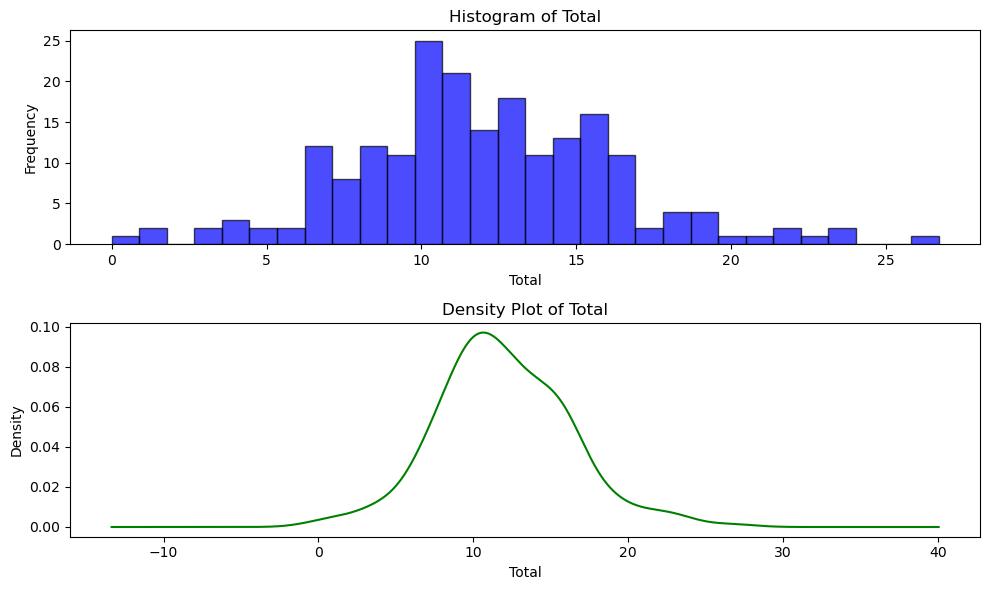

count    202.000000
mean      11.930198
std        4.258177
min        0.000000
25%        9.400000
50%       11.550000
75%       14.700000
max       26.700000
Name: Total, dtype: float64

In [199]:
# Filter for the "Total" column and ensure it is numeric
data['Total'] = pd.to_numeric(data['Total'], errors='coerce')

# Calculate summary statistics for "Total"
summary_stats = data['Total'].describe()

# Visualize distribution using histograms and density plots
plt.figure(figsize=(10, 6))

# Histogram
plt.subplot(2, 1, 1)
plt.hist(data['Total'].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Total')
plt.xlabel('Total')
plt.ylabel('Frequency')

# Density Plot
plt.subplot(2, 1, 2)
data['Total'].dropna().plot(kind='density', color='green')
plt.title('Density Plot of Total')
plt.xlabel('Total')

plt.tight_layout()
plt.show()

summary_stats

The maximum possible Total Score is 100, representing the highest performance in terms of gender equality and respect. This includes aspects such as working environment, compensation and benefits, and the prevention of violence and harassment.

**Statistical Summary**:
1. Count: 202 companies are included in the dataset.
2. Mean: The average Total Score is 11.93, which is far below from the maximum possible score of 100.
3. Standard Deviation: The scores have a spread of 4.26, indicating moderate variability in performance.
4. Minimum: The lowest score is 0, suggesting that some companies performed extremely poorly in gender equality measures.
5. Maximum: The highest score in the dataset is 26.70, far below the theoretical maximum of 100, which highlights the overall poor performance.

**Visual Observations**:
1. Histogram: The majority of the scores are clustered around the 10-15 range, with the frequency peaking near the mean (11.93). Very few companies scored above 20, indicating that achieving high scores is uncommon in this dataset.
2. Density Plot: The density curve is slightly skewed to the right, with a long tail extending towards higher scores, highlighting a few outliers with better performance. The peak of the density aligns closely with the mean and median, reinforcing the clustering of scores in the mid-range.

**Key Insights**:

The low mean, median, and maximum values underscore that most companies in the dataset are performing poorly on gender equality and respect indicators. There is a significant opportunity for improvement, as no company has achieved scores close to the theoretical maximum.

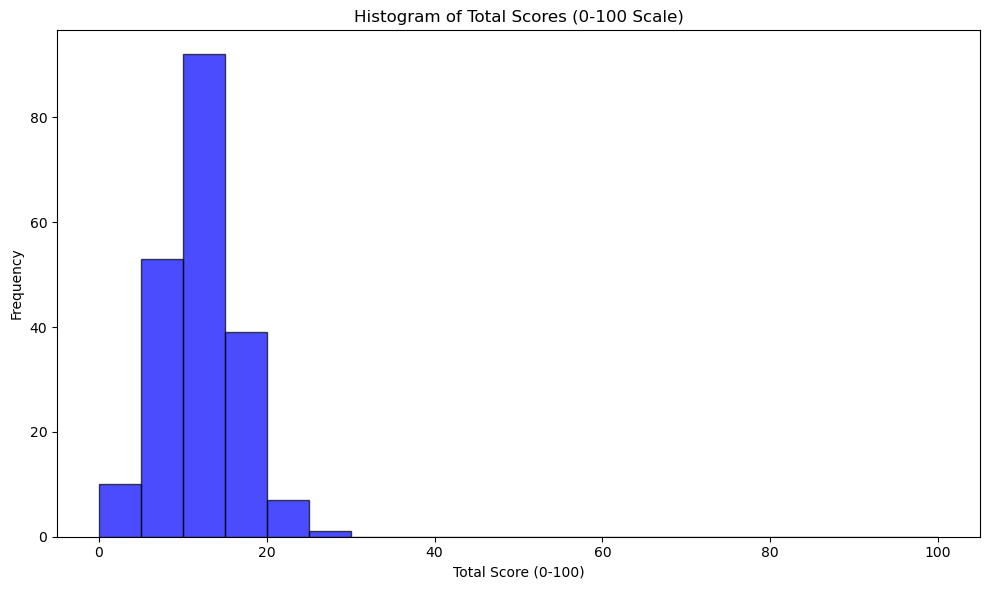

In [200]:
# Histogram with the scale set to 0-100
plt.figure(figsize=(10, 6))

# Histogram with fixed range 0-100
plt.hist(data['Total'].dropna(), bins=20, range=(0, 100), alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Total Scores (0-100 Scale)')
plt.xlabel('Total Score (0-100)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


When we put the data into a scale of 0-100 (the theoritical scale), we can see the overall performance of the companies in a more clear way:

**Visual Observations**:
1. Data Concentration: The majority of the Total Scores fall well below the midpoint of the 0-100 scale, with most scores concentrated between 0 and 30.
2. Lack of High Scores: No data points exceed a score of 30 out of 100, indicating that companies in the dataset perform significantly below the potential benchmark.

**Key Insights**:

The visualization starkly highlights the underperformance of these companies in meeting gender equality standards. This may point to systemic issues or a lack of substantial initiatives toward achieving higher scores.

### Univariate Analysis for CEO Gender

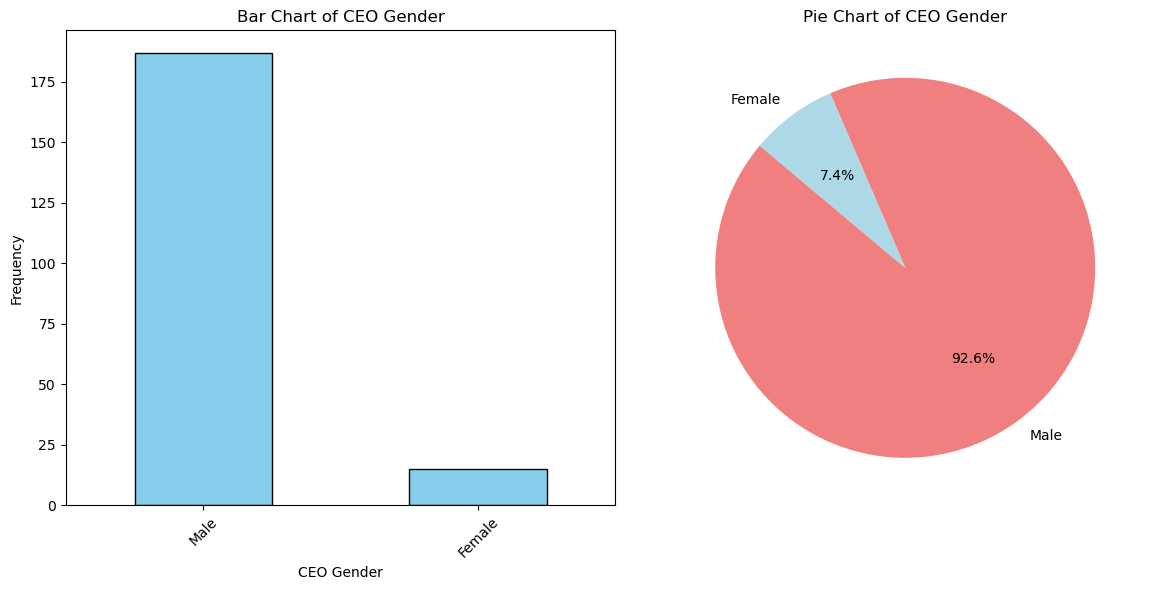

CEO Gender
Male      187
Female     15
Name: count, dtype: int64

In [201]:
# Frequency counts for "CEO Gender"
ceo_gender_counts = data['CEO Gender'].value_counts()

# Visualizing the distribution using bar chart and pie chart
plt.figure(figsize=(12, 6))

# Bar Chart
plt.subplot(1, 2, 1)
ceo_gender_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Chart of CEO Gender')
plt.xlabel('CEO Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Pie Chart
plt.subplot(1, 2, 2)
ceo_gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Pie Chart of CEO Gender')
plt.ylabel('')  # Removing the y-label for a cleaner pie chart

plt.tight_layout()
plt.show()

ceo_gender_counts

The data reveals a significant imbalance in CEO gender representation:

**Visual Observations**:

The majority of CEOs in the dataset are male (92.6%), while only a small percentage (7.4%) are female. The bar and pie charts both illustrate this stark gender gap, emphasizing the dominance of male CEOs across companies.

**Key Insights**:

This disparity showed in the charts highlights a clear underrepresentation of women in top leadership positions. Coupled with the low Total Scores observed for gender equality indicators, it is evident that most companies are underperforming in fostering a more equitable and inclusive environment. This imbalance underscores the need for stronger initiatives and actionable commitments to promote gender diversity at the leadership level.

## Bivariate and Multivariate Analysis

### Differences in Financial Indicator Means by CEO Gender

In [202]:
financial_columns = [
    "NetIncomeLoss (k)",
    "OperatingIncomeLoss (k)",
    "GrossProfit (k)",
    "ComprehensiveIncomeNetOfTax (k)",
    "EarningsPerShareBasic",
    "RevenueFromContractWithCustomerExcludingAssessedTax (k)",
    "EntityPublicFloat (k)",
    "AllocatedShareBasedCompensationExpense (k)",
    "CashAndCashEquivalentsAtCarryingValue (k)",
    "AccountsReceivableNetCurrent (k)"
]

First, we apply **Z-Score Normalization** to the financial data to handle differences in scale. Financial indicators like Net Income, Revenue, and Cash and Cash Equivalents can vary greatly in magnitude. For example: A large company might have billions in revenue, while a smaller company might only have millions. In this case, indicators with larger values may dominate models or visualizations if left unnormalized. By applying Z-Score normalization, all indicators are transformed to a consistent scale where the magnitude of their values is relative to their distribution. This ensures that all features contribute equally to analyses and models, preventing bias from large-scale differences.

In [203]:
# Z-Score Normalization
data[financial_columns] = data[financial_columns].apply(
    lambda x: (x - np.mean(x)) / np.std(x), axis=0
)

**Min-Max Normalization** is often applied after Z-Score standardization to scale the data into a specific range. This process is particularly useful when the goal is to standardize the data while preserving its relative differences and ensuring all values are positive. In this case, Min-Max Normalization can also help enhancing the interpretability of the data.

In [204]:
# Min-Max Scaling
scaler = MinMaxScaler()
data[financial_columns] = scaler.fit_transform(data[financial_columns])

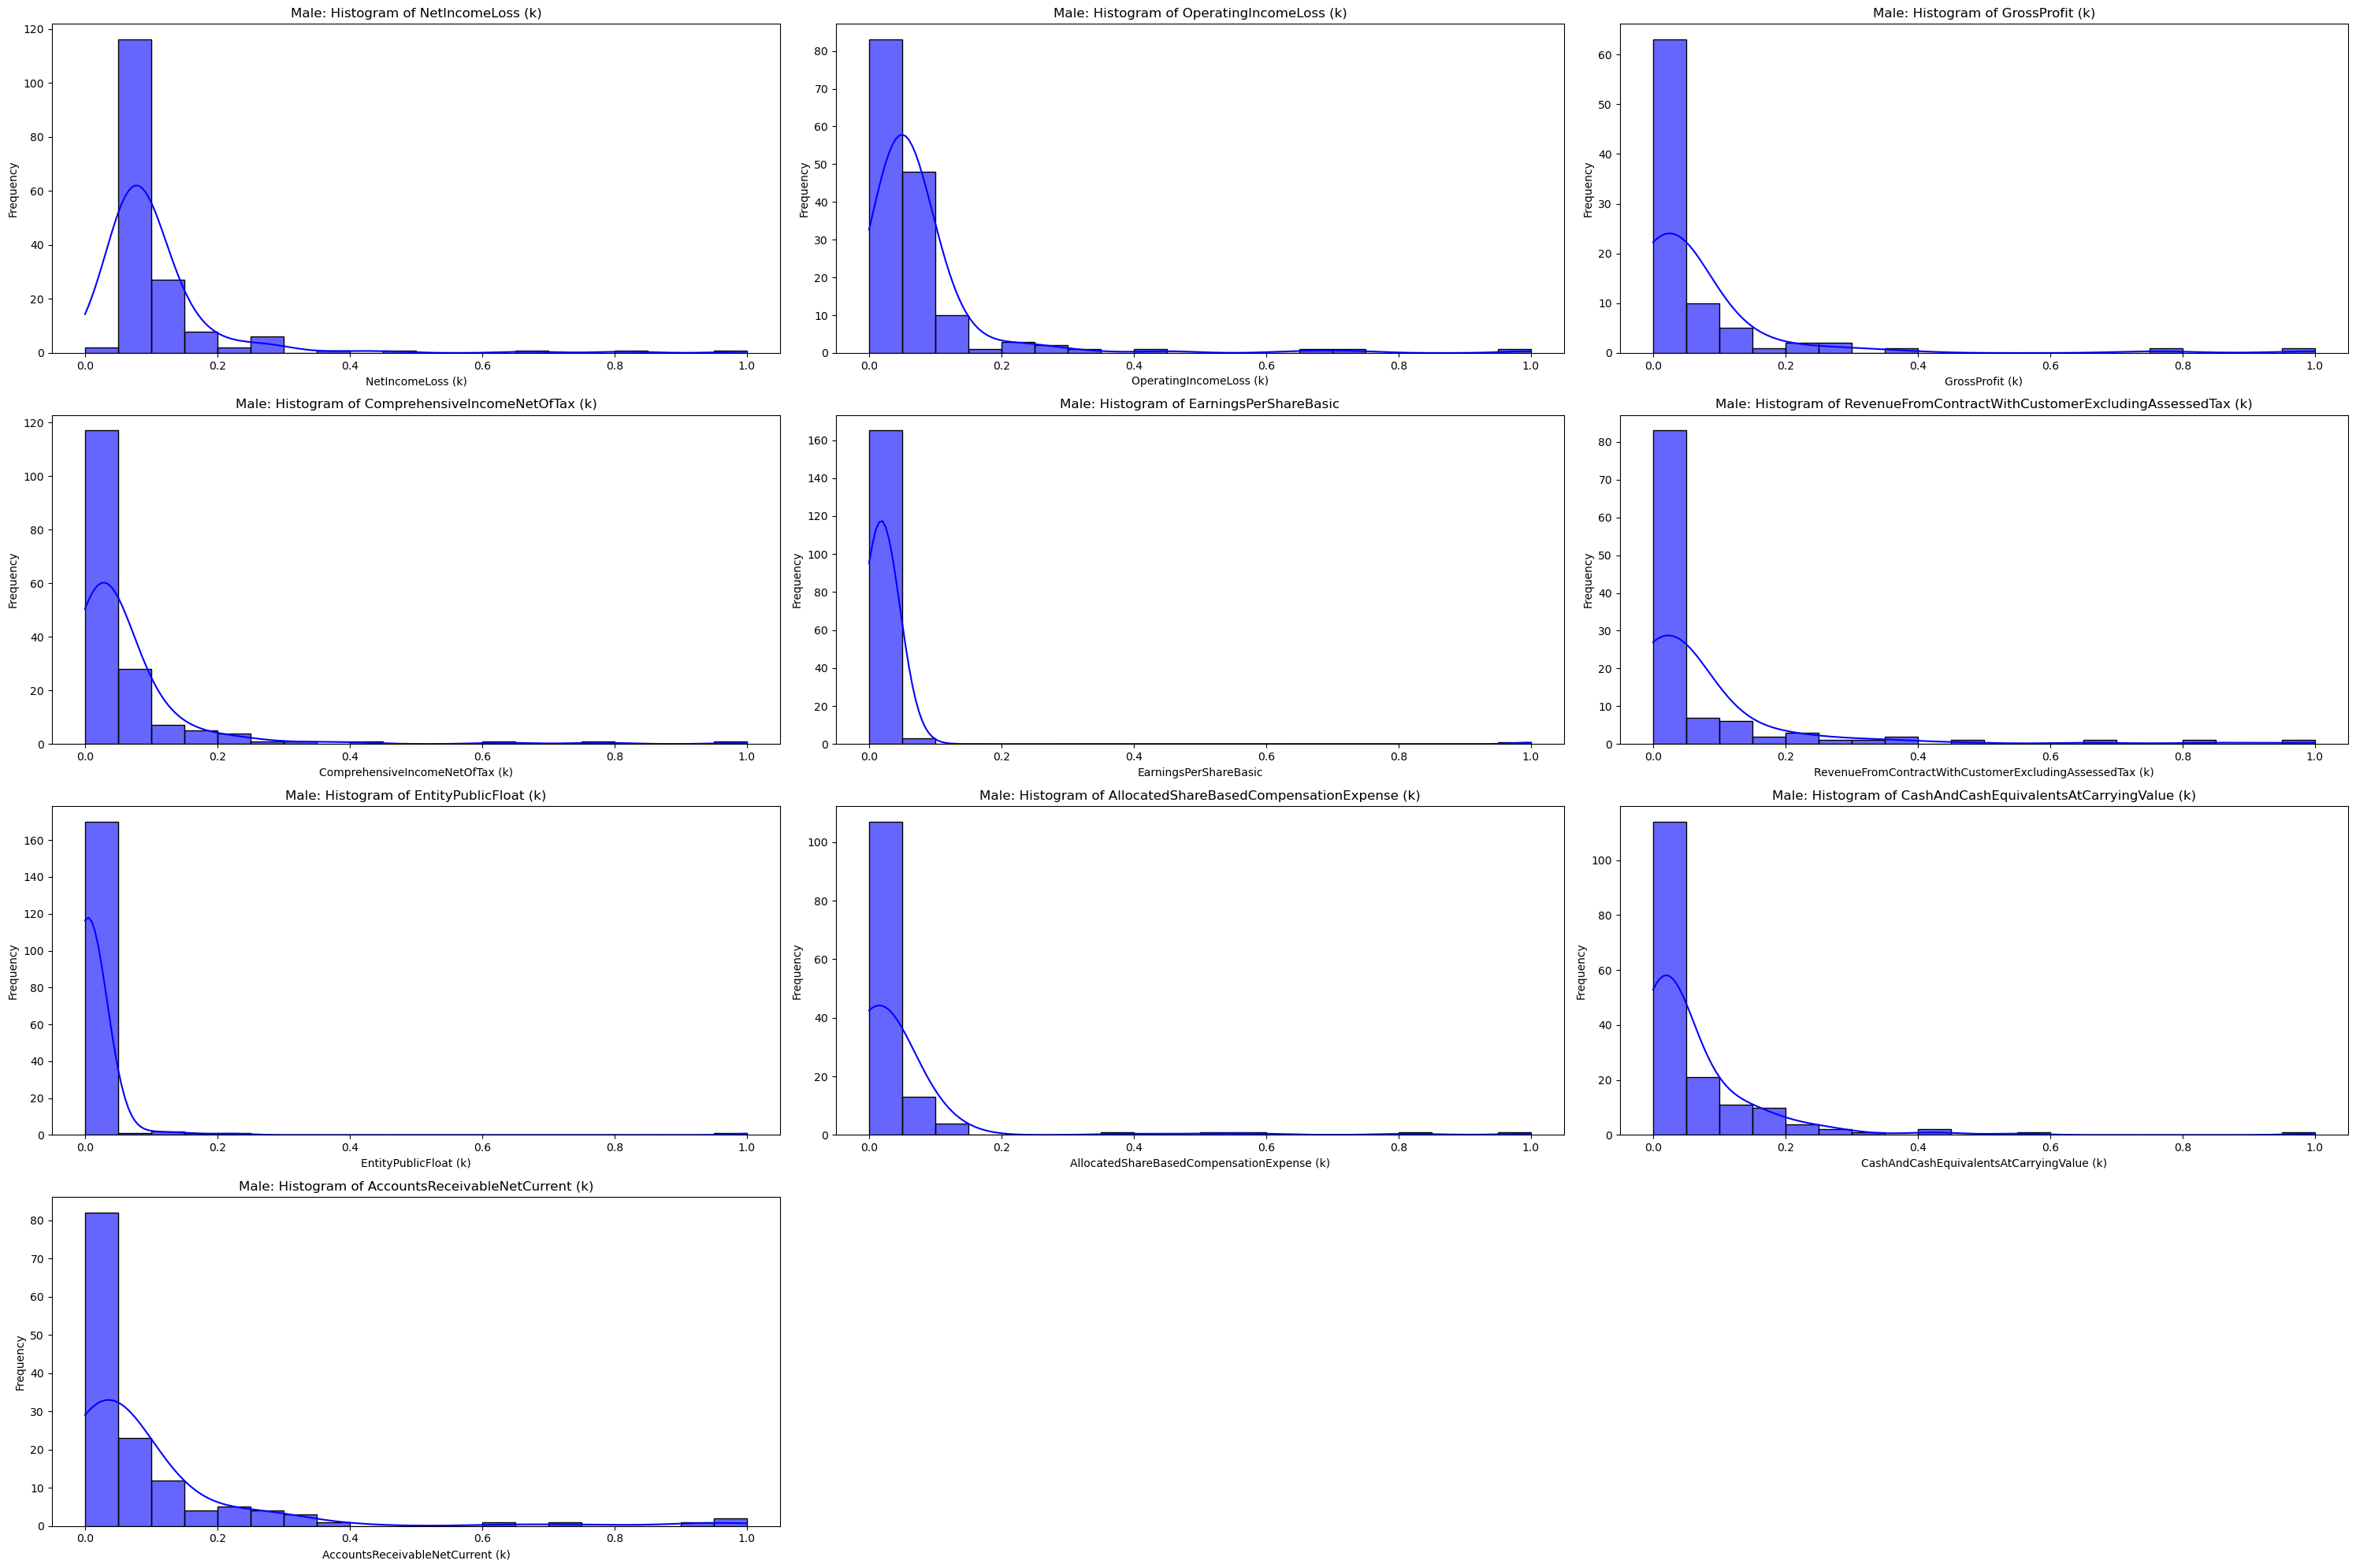

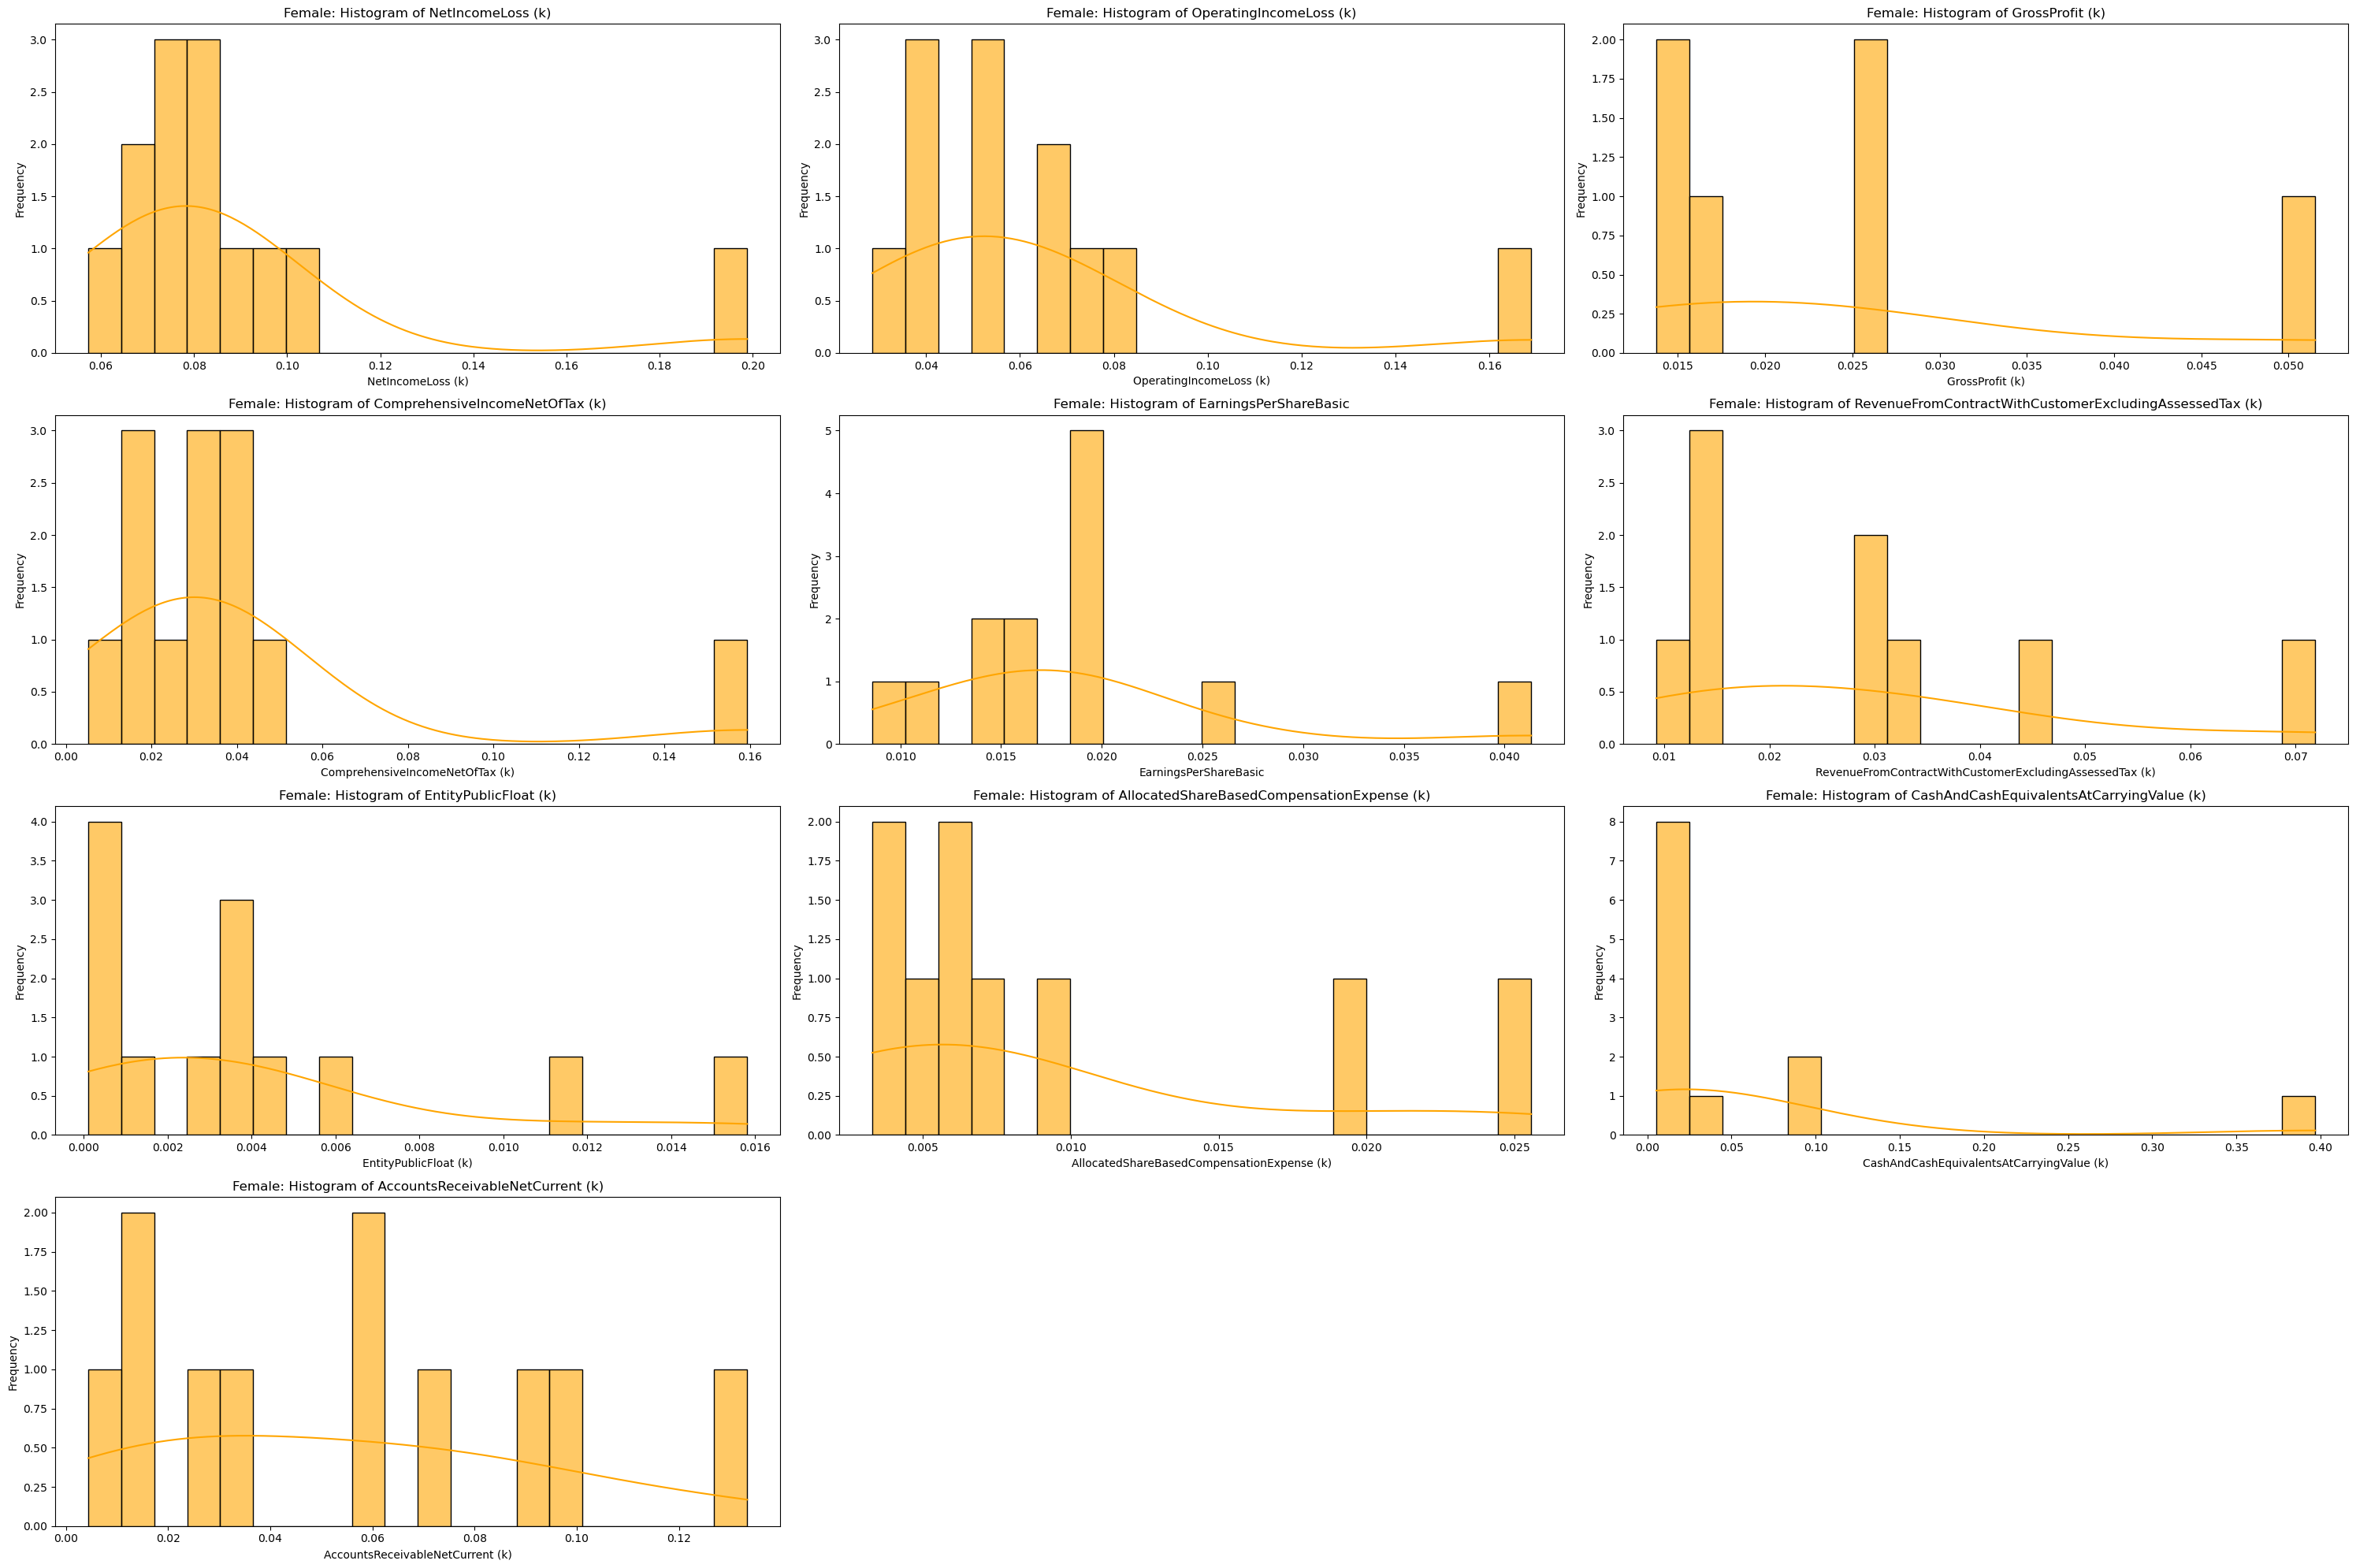

In [205]:
num_plots = len(financial_columns)
cols = 3
rows = math.ceil(num_plots / cols)

# Histograms for Normalized Financial Indicators - Separate Male/Female
for gender in data['CEO Gender'].unique():
    plt.figure(figsize=(30, 5 * rows))
    for i, col in enumerate(financial_columns, start=1):
        plt.subplot(rows, cols, i)
        sns.histplot(
            data=data[data['CEO Gender'] == gender],
            x=col,
            kde=True,
            alpha=0.6,
            bins=20,
            color='blue' if gender == 'Male' else 'orange'
        )
        plt.title(f"{gender}: Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


**Visual Observations**:

1. Overall Data Range:

- For companies with **Male CEOs**, the financial indicators span a much wider range, with a significant concentration near the lower values, but some extreme high outliers are visible. This suggests a diverse performance range, where a few companies dominate with high financial metrics.
- In contrast, companies with **Female CEOs** have a much narrower range for most financial indicators, with data clustered tightly around lower to mid-range values. This indicates less variability and generally lower financial performance metrics.

2. Specific Indicators:

- Net Income and Operating Income: **Male-led companies** show higher peaks near lower values but also have long tails extending toward higher financial performance. **Female-led companies’** distributions are narrower and concentrated, with no significant high outliers.
- Revenue and Gross Profit: Similar patterns emerge, with **male-led companies** exhibiting broader ranges and higher maximum values compared to **female-led companies**.
- Allocated Share-Based Compensation: **Male-led companies** show long-tailed distributions, while **female-led companies’** distributions are tightly packed, with values concentrated at lower levels.

3. KDE Trends:

- The kernel density estimates (KDE) for **Male CEOs** show smoother, more continuous distributions, reflecting a broad variation.
- The KDE for **Female CEOs** is more irregular, indicating fewer data points and clustering around mid-range values.

**Key Insights**:

1. Variability in Financial Indicators:

- **Male-led companies** show greater variability across all financial indicators, likely reflecting a larger sample size and broader representation of performance levels.
- **Female-led companies** exhibit more homogeneity, with fewer extreme values and narrower performance ranges.

2. Potential Underrepresentation:

- The tighter distributions for **Female CEOs** might reflect both underrepresentation in the dataset and structural barriers limiting their opportunities to lead larger or high-performing companies.

3. Outliers in Male-led Companies:

- The presence of significant outliers for **Male CEOs** skews the distribution, suggesting that high-performing companies disproportionately drive the observed patterns.

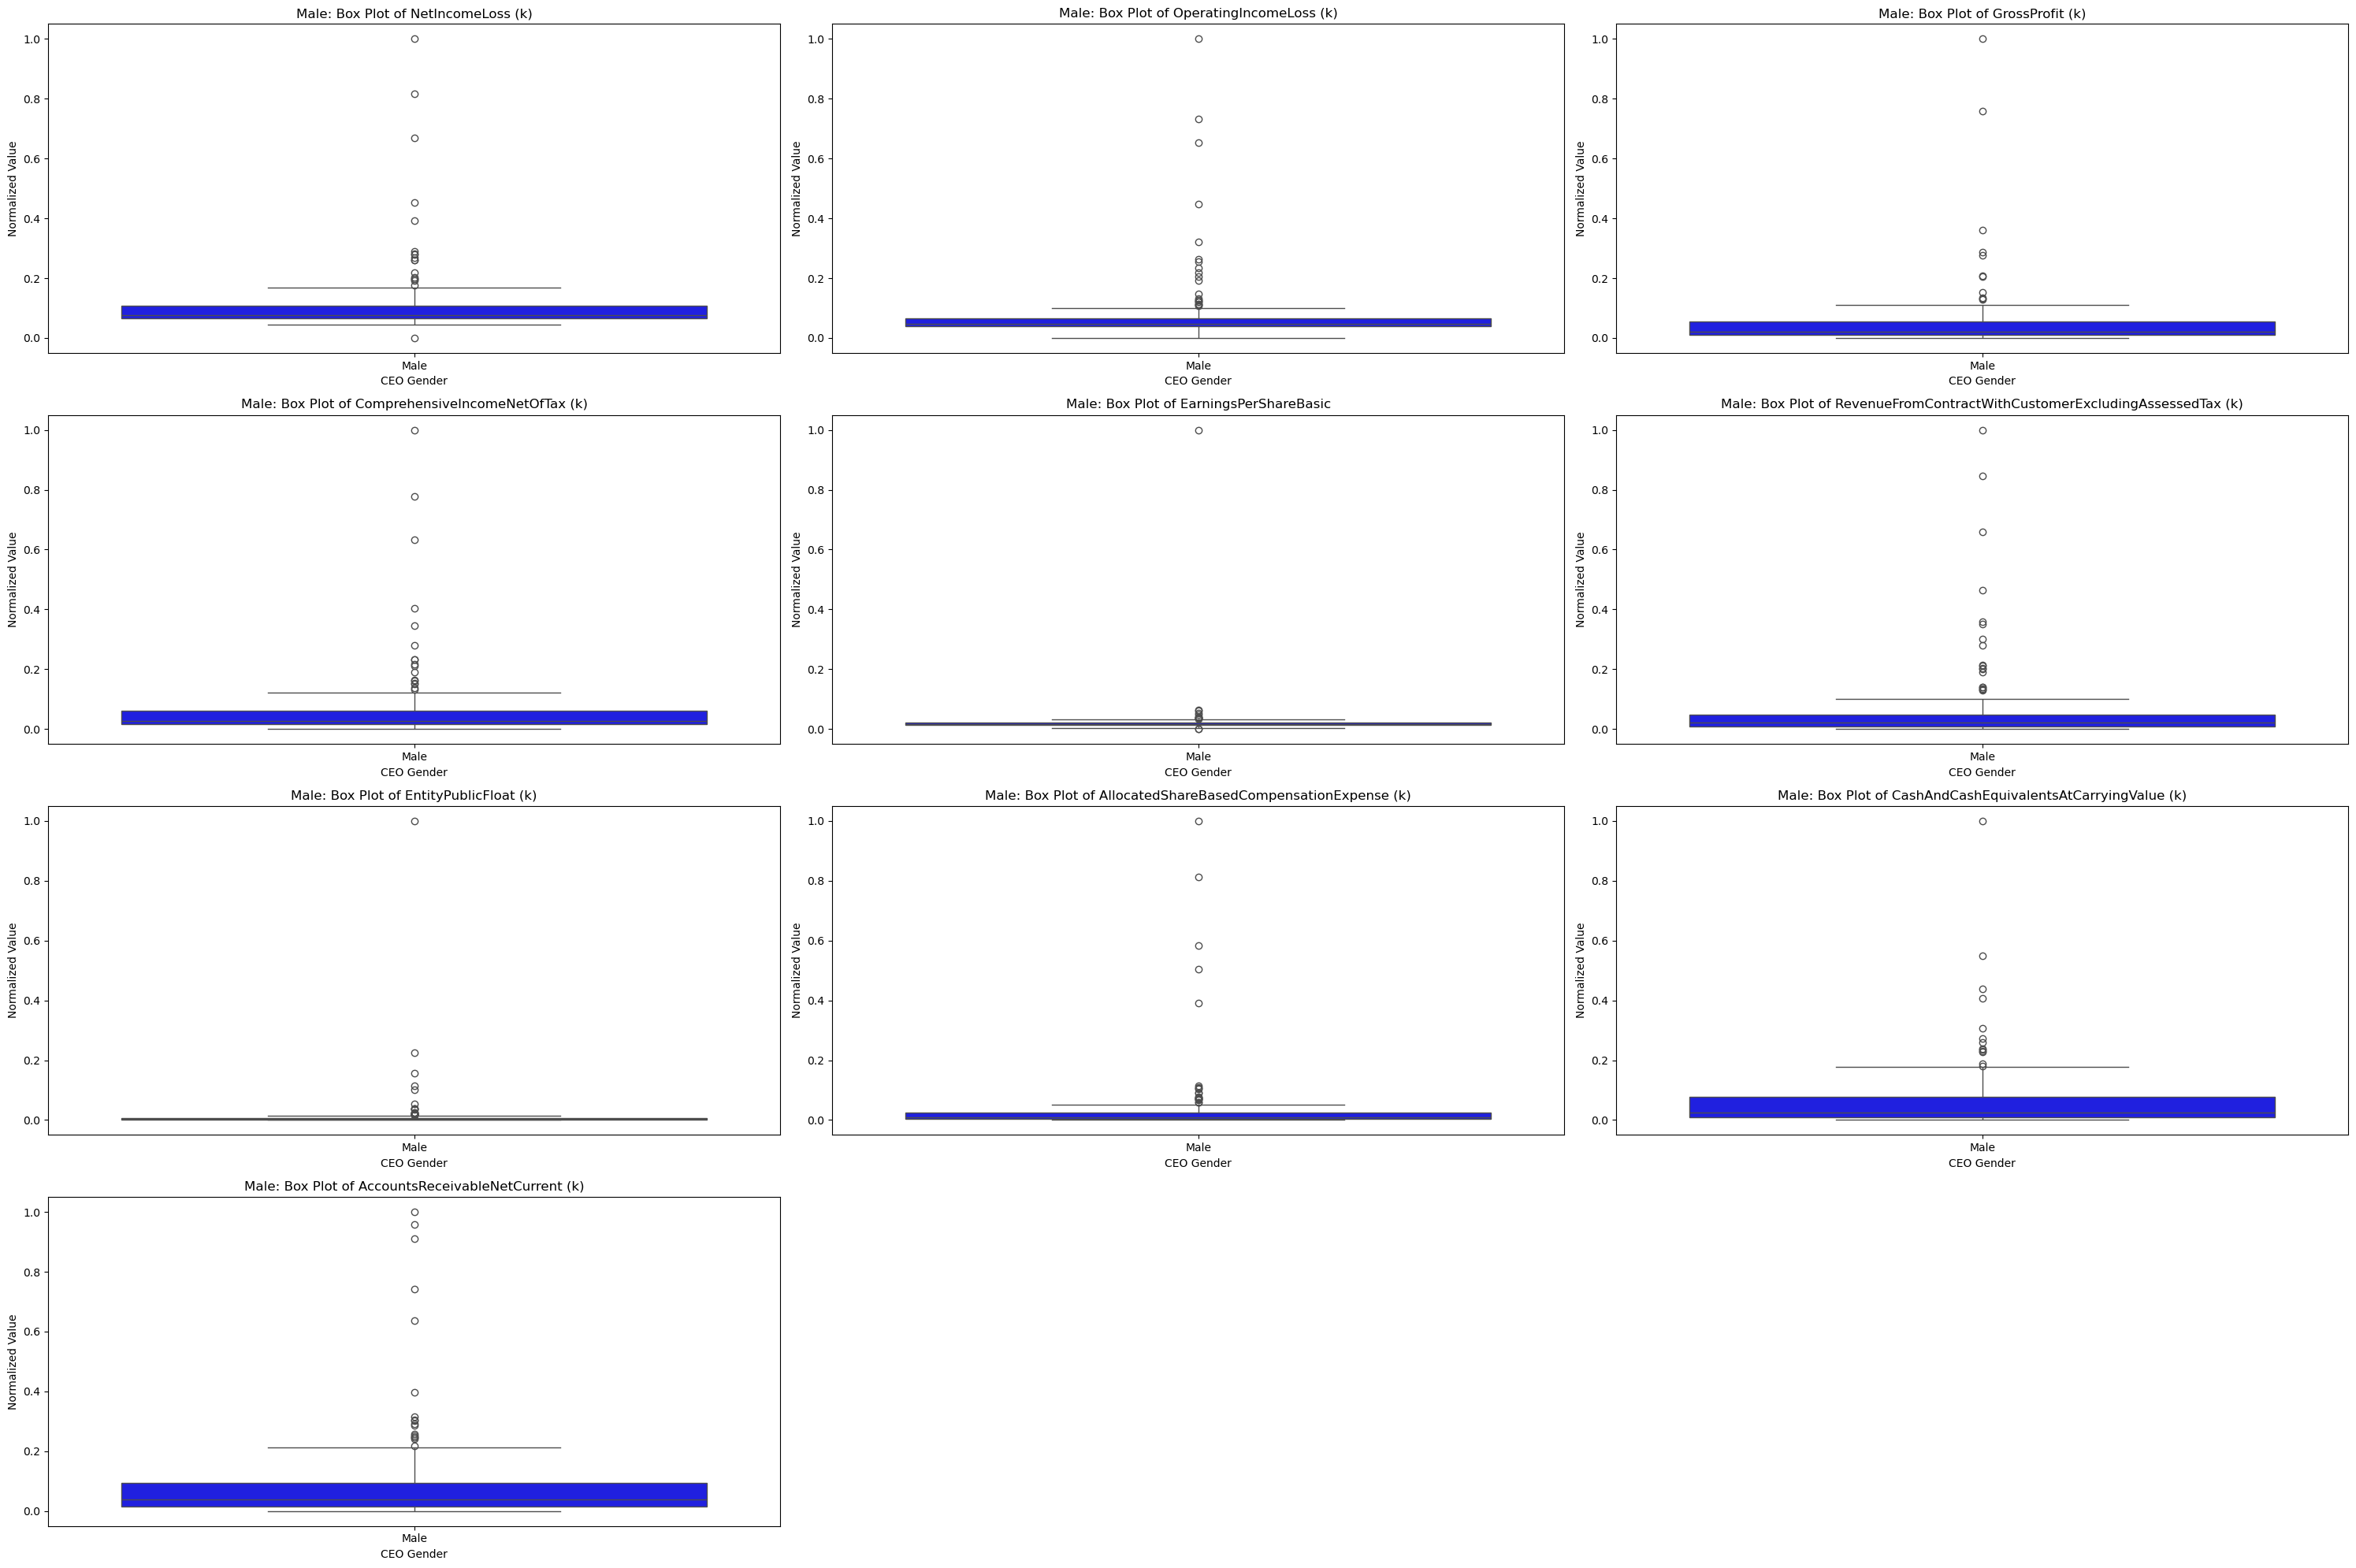

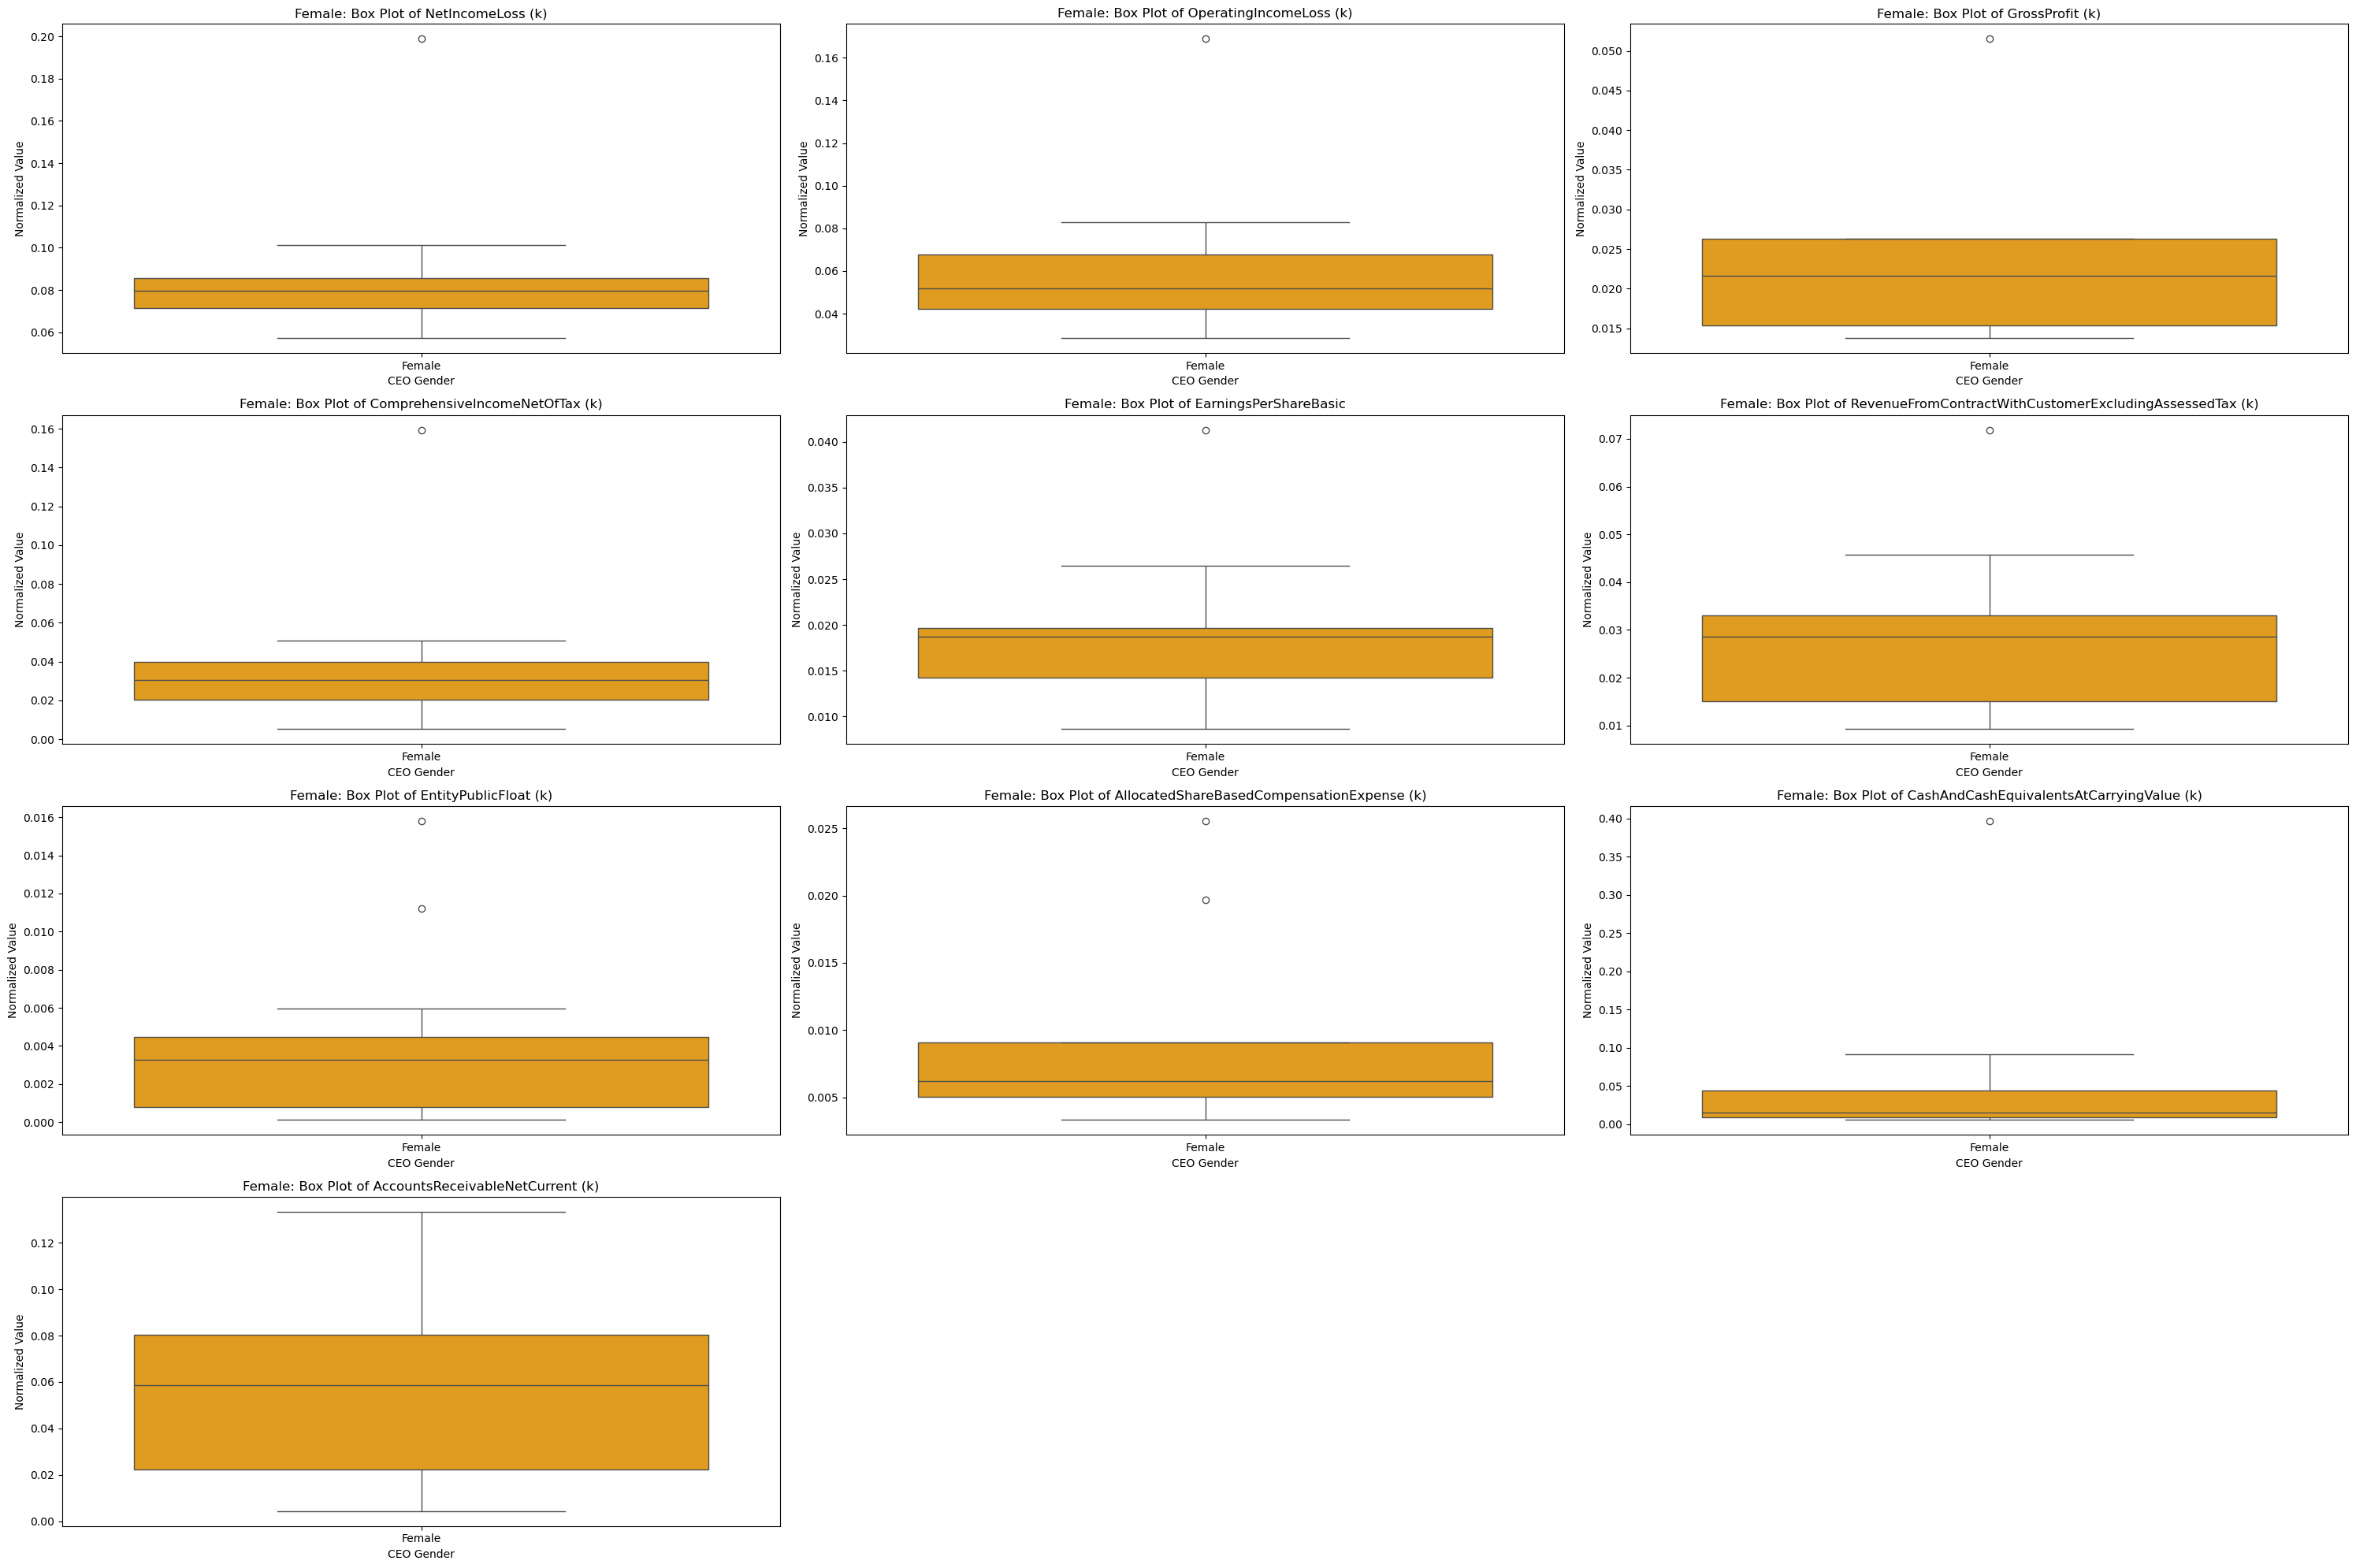

In [206]:
# Box Plots for Normalized Financial Indicators - Separate Male/Female
for gender in data['CEO Gender'].unique():
    plt.figure(figsize=(30, 5 * rows))
    for i, col in enumerate(financial_columns, start=1):
        plt.subplot(rows, cols, i)
        sns.boxplot(
            data=data[data['CEO Gender'] == gender],
            x='CEO Gender',
            y=col,
            color='blue' if gender == 'Male' else 'orange'
        )
        plt.title(f"{gender}: Box Plot of {col}")
        plt.xlabel("CEO Gender")
        plt.ylabel("Normalized Value")
    plt.tight_layout()
    plt.show()

**Visual Observations**:

1. Overall Data Spread and Outliers:

- For companies with **Male CEOs**, the financial indicators exhibit a wider spread and numerous outliers, indicating greater variability and the presence of high-performing companies.
- In contrast, for companies with **Female CEOs**, the financial indicators show a much tighter interquartile range (IQR) with fewer or no extreme outliers, suggesting more consistent and narrower performance levels.

2. Specific Indicators:

- Net Income and Operating Income: **Male-led companies** have significantly more outliers extending to higher values, reflecting a small subset of companies with extraordinary financial performance. **Female-led companies'** distributions are compact, with median values centered closer to lower ranges.
- Revenue and Gross Profit: Similar to income metrics, **male-led companies** demonstrate greater dispersion, with outliers pulling the upper bounds of the box plots far higher. **Female-led companies** maintain a more uniform range of values, with medians skewed toward the lower end.
- Allocated Share-Based Compensation: **Male-led companies** have extreme values influencing the distribution significantly, whereas **female-led companies** remain tightly grouped.

3. Median Comparison:

- Across most financial indicators, the medians for **male-led companies** are higher than those for **female-led companies**, reflecting potentially higher overall performance metrics for **male-led companies** in this dataset.
- However, the consistent range and central tendency for **female-led companies** suggest stability and less variability.

4. Presence of Outliers:

- **Male-led companies** display more frequent and extreme outliers in nearly every financial indicator, highlighting the presence of a small subset of exceptionally high-performing companies.
- **Female-led companies** show fewer or no significant outliers, indicating more clustered performance around the median.

**Key Insights**:

- The broader ranges and higher outliers for **male-led companies** suggest greater access to opportunities or larger-scale operations.
- **Female-led companies** may operate under constraints, as reflected in their tighter distributions and lower upper bounds.

In [207]:
# Statistical Testing
stat_results = []
for col in financial_columns:

    male_values = data[data['CEO Gender'] == 'Male'][col].dropna()
    female_values = data[data['CEO Gender'] == 'Female'][col].dropna()
    
    t_stat, t_pvalue = ttest_ind(male_values, female_values, equal_var=False, nan_policy='omit')
    
    stat_results.append({
        'Indicator': col,
        'T-Test p-value': t_pvalue
    })

# Create a DataFrame to summarize test results
results_df = pd.DataFrame(stat_results)

# Display the results
print(results_df)

                                           Indicator  T-Test p-value
0                                  NetIncomeLoss (k)        0.092989
1                            OperatingIncomeLoss (k)        0.244203
2                                    GrossProfit (k)        0.016878
3                    ComprehensiveIncomeNetOfTax (k)        0.097709
4                              EarningsPerShareBasic        0.327595
5  RevenueFromContractWithCustomerExcludingAssess...        0.006722
6                              EntityPublicFloat (k)        0.091844
7         AllocatedShareBasedCompensationExpense (k)        0.003232
8          CashAndCashEquivalentsAtCarryingValue (k)        0.883309
9                   AccountsReceivableNetCurrent (k)        0.038959


**Hypotheses**:

For each financial indicator:

- Null Hypothesis (H0): There is no difference in the mean of this financial indicator between male- and female-led companies.
- Alternative Hypothesis (H1): There is a significant difference in the mean of this financial indicator between male- and female-led companies.

**Significance Level**:
The significance level (α) is set to 0.05. P-values below 0.05 indicate a rejection of the null hypothesis, meaning there is a significant difference in the means.

**Analysis**:

| **Indicator**                                              | **T-Test p-value** | **Conclusion**                                                                                                        |
|------------------------------------------------------------|--------------------|----------------------------------------------------------------------------------------------------------------------|
| **NetIncomeLoss (k)**                                      | 0.092989           | p-value > 0.05: Fail to reject \(H_0\). No significant difference in Net Income means between male- and female-led companies. |
| **OperatingIncomeLoss (k)**                                | 0.244203           | p-value > 0.05: Fail to reject \(H_0\). No significant difference in Operating Income means between the two groups.         |
| **GrossProfit (k)**                                        | 0.016878           | p-value < 0.05: Reject \(H_0\). Significant difference in Gross Profit means between male- and female-led companies.        |
| **ComprehensiveIncomeNetOfTax (k)**                        | 0.097709           | p-value > 0.05: Fail to reject \(H_0\). No significant difference in Comprehensive Income means between the two groups.     |
| **EarningsPerShareBasic**                                  | 0.327595           | p-value > 0.05: Fail to reject \(H_0\). No significant difference in Earnings Per Share means between male- and female-led companies. |
| **RevenueFromContractWithCustomerExcludingAssessedTax (k)**| 0.006722           | p-value < 0.05: Reject \(H_0\). Significant difference in Revenue means between male- and female-led companies.             |
| **EntityPublicFloat (k)**                                  | 0.091844           | p-value > 0.05: Fail to reject \(H_0\). No significant difference in Entity Public Float means between the two groups.      |
| **AllocatedShareBasedCompensationExpense (k)**             | 0.003232           | p-value < 0.05: Reject \(H_0\). Significant difference in Share-Based Compensation Expense means between male- and female-led companies. |
| **CashAndCashEquivalentsAtCarryingValue (k)**              | 0.883309           | p-value > 0.05: Fail to reject \(H_0\). No significant difference in Cash and Cash Equivalents means between the two groups. |
| **AccountsReceivableNetCurrent (k)**                       | 0.038959           | p-value < 0.05: Reject \(H_0\). Significant difference in Accounts Receivable means between male- and female-led companies. |

**Key Findings**:

1. Significant Differences (p-value < 0.05):
- Gross Profit (k): **Male-led companies** likely achieve higher gross profit.
- Revenue from Contract with Customer Excluding Assessed Tax (k): **Male-led companies** generate significantly higher revenue.
- Allocated Share Based Compensation Expense (k): **Male-led companies** allocate more in share-based compensation.
- Accounts Receivable Net Current (k): **Male-led companies** show significantly higher accounts receivable values.

2. No Significant Differences (p-value > 0.05):
- Indicators like Net Income, Operating Income, and Cash and Cash Equivalents do not show a statistically significant difference between male- and female-led companies.


### Relationships Between Financial Indicators and Total Score

In [208]:
spearman_results = []
spearman_p_values = []

for col in financial_columns:

    temp_data = data[[col, 'Total']].dropna() 
    
    if len(temp_data) > 1: 
  
        corr, p_value = spearmanr(temp_data[col], temp_data['Total'])
        spearman_results.append((col, corr))
        spearman_p_values.append((col, p_value))

spearman_corr_df = pd.DataFrame(spearman_results, columns=['Financial Indicator', 'Spearman_Correlation'])
spearman_p_value_df = pd.DataFrame(spearman_p_values, columns=['Financial Indicator', 'P_Value'])

print("Spearman correlation between financial indicators and Total:")
print(spearman_corr_df)

print("\nSpearman p-values between financial indicators and Total:")
print(spearman_p_value_df)

Spearman correlation between financial indicators and Total:
                                 Financial Indicator  Spearman_Correlation
0                                  NetIncomeLoss (k)              0.301555
1                            OperatingIncomeLoss (k)              0.215105
2                                    GrossProfit (k)              0.406968
3                    ComprehensiveIncomeNetOfTax (k)              0.290847
4                              EarningsPerShareBasic              0.009864
5  RevenueFromContractWithCustomerExcludingAssess...              0.211388
6                              EntityPublicFloat (k)              0.250925
7         AllocatedShareBasedCompensationExpense (k)              0.379946
8          CashAndCashEquivalentsAtCarryingValue (k)              0.203521
9                   AccountsReceivableNetCurrent (k)              0.347991

Spearman p-values between financial indicators and Total:
                                 Financial Indicator   

**Key Metrics**:
1. Spearman Correlation: Measures the monotonic relationship between each financial indicator and the Total Score. Values closer to 1 or -1 indicate stronger relationships.
2. p-Values: Evaluate the statistical significance of these correlations. A p-value below 0.05 suggests the relationship is statistically significant.

**Key Findings**:
| **Financial Indicator**                                   | **Spearman Correlation** | **p-Value** | **Conclusion**                                                                                                   |
|-----------------------------------------------------------|---------------------------|-------------|-----------------------------------------------------------------------------------------------------------------|
| **NetIncomeLoss (k)**                                     | 0.301555                  | 0.000041    | Total Score positively influences Net Income, suggesting companies with higher Total Scores tend to be more profitable. |
| **OperatingIncomeLoss (k)**                               | 0.215105                  | 0.005674    | Total Score has a moderate positive relationship with Operating Income, though the effect is less pronounced.   |
| **GrossProfit (k)**                                       | 0.406968                  | 0.000057    | Total Score strongly influences Gross Profit, indicating that companies excelling in gender equality likely operate more efficiently. |
| **ComprehensiveIncomeNetOfTax (k)**                       | 0.290847                  | 0.000075    | Higher Total Scores are associated with greater Comprehensive Income, reflecting broader financial benefits.    |
| **EarningsPerShareBasic**                                 | 0.009864                  | 0.894856    | No meaningful relationship exists between Total Score and Earnings Per Share.                                   |
| **RevenueFromContractWithCustomerExcludingAssessedTax (k)**| 0.211388                  | 0.021570    | Higher Total Scores weakly influence Revenue, suggesting some alignment with revenue generation.                |
| **EntityPublicFloat (k)**                                 | 0.250925                  | 0.000496    | Total Score moderately influences Public Float, showing stronger market confidence in equitable companies.      |
| **AllocatedShareBasedCompensationExpense (k)**            | 0.379946                  | 0.000004    | Total Score strongly influences Share-Based Compensation, reflecting better employee-focused financial practices. |
| **CashAndCashEquivalentsAtCarryingValue (k)**             | 0.203521                  | 0.006285    | Total Score weakly influences Cash Holdings, indicating minimal impact on liquidity.                           |
| **AccountsReceivableNetCurrent (k)**                      | 0.347991                  | 0.000013    | Total Score positively impacts Accounts Receivable, suggesting better operational reach or customer relationships. |

**Summary of Relationships**:
1. Strongest Positive Correlations:
- Gross Profit (k) (r=0.41, p<0.001): Companies with higher Total Scores tend to have significantly higher gross profits.
- Allocated Share-Based Compensation Expense (k) (r=0.38, p<0.001): Companies with better Total Scores tend to invest more in share-based compensation.
- Accounts Receivable (k) (r=0.35, p<0.001): Companies perform better in Total Score generally have higher receivables.

2. Moderate Positive Correlations:
- Total Score shows significant but slightly weaker correlations with indicators like Net Income, Comprehensive Income, and Entity Public Float, suggesting it's positive impact on them is consistent but less pronounced.

3. Weak or No Correlation:
- Earnings Per Share Basic (r=0.01,p=0.89): No meaningful relationship, indicating that Total Score does not significantly contribute to EPS.

**Key Insights**:
1. Total Score as a Predictor:
- Total Score, as a measure of gender equality and respect, is positively correlated with key financial indicators, suggesting that equitable practices can drive financial success.
- The strongest relationships exist with Gross Profit, Share-Based Compensation Expense, and Accounts Receivable, indicating that companies with better Total Scores tend to excel in profitability, employee-focused expenditures, and operational reach.

2. Weak or Insignificant Effects:
- Earnings Per Share (EPS) shows no meaningful relationship with Total Score, indicating that equality practices may not directly affect shareholder returns.
- The weak relationship with Revenue suggests that higher Total Scores might influence operational efficiency (e.g., Gross Profit) more than top-line growth.

3. Employee-Centric Practices:
- The strong correlation with Allocated Share-Based Compensation Expense highlights that companies prioritizing gender equality often invest more in employee-focused financial policies, potentially boosting workplace satisfaction and productivity.

## Text Analysis and Feature Engineering

### Keyword Analysis: Comparing Gender Policies and Actions Across Workplace and Supply Chain Contexts

To better analyze different key features in workplace and supply chain, we select following variables:

**Work Place**:

GPG-C01.EA-Evidence: Evidence of whether the company collects sex-disaggregated pay data in the workplace.

HSW-D01.EA-Evidence: The company has a publicly available policy statement committing it to respect the health and safety of its employees.

**Supply Chain**:

CAP-A07.EA-Evidence: The company screens for gender-related issues among its suppliers as part of its audit process.

SHS-D02.EA-Evidence: Evidence of health and safety measures for workers in the supply chain.

First, we choose to retain only relevant columns for analysis.

In [137]:
# Filter rows where 'has_evidence' is 1 for both workplace and supply chain variables
workplace_columns = ['GPG-C01.EA-Evidence', 'GPG-C01.EA-Evidence-has_evidence',
                     'HSW-D01.EA-Evidence', 'HSW-D01.EA-Evidence-has_evidence']
supply_chain_columns = ['CAP-A07.EA-Evidence', 'CAP-A07.EA-Evidence-has_evidence',
                        'SHS-D02.EA-Evidence', 'SHS-D02.EA-Evidence-has_evidence']

# Filter rows
workplace_df = data[data['GPG-C01.EA-Evidence-has_evidence'] == 1][workplace_columns]
workplace_df = workplace_df[workplace_df['HSW-D01.EA-Evidence-has_evidence'] == 1][workplace_columns]
supply_chain_df = data[data['CAP-A07.EA-Evidence-has_evidence'] == 1][supply_chain_columns]
supply_chain_df = supply_chain_df[supply_chain_df['SHS-D02.EA-Evidence-has_evidence'] == 1][supply_chain_columns]

Next, we use term frequency analysis on the filtered text to identify commonly used keywords. And we use wordcload plots and bar plots to visualize the results.

In [138]:
# Keyword extraction
def extract_keywords(text_series):
    vectorizer = CountVectorizer(max_features=20)
    X = vectorizer.fit_transform(text_series)
    keywords = vectorizer.get_feature_names_out()
    frequencies = X.toarray().sum(axis=0)
    return dict(zip(keywords, frequencies))

# Extract keywords from explanations
workplace_keywords = extract_keywords(workplace_df['GPG-C01.EA-Evidence'].dropna())
supply_chain_keywords = extract_keywords(supply_chain_df['CAP-A07.EA-Evidence'].dropna())

In [139]:
# Visualization
def plot_wordcloud(keyword_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

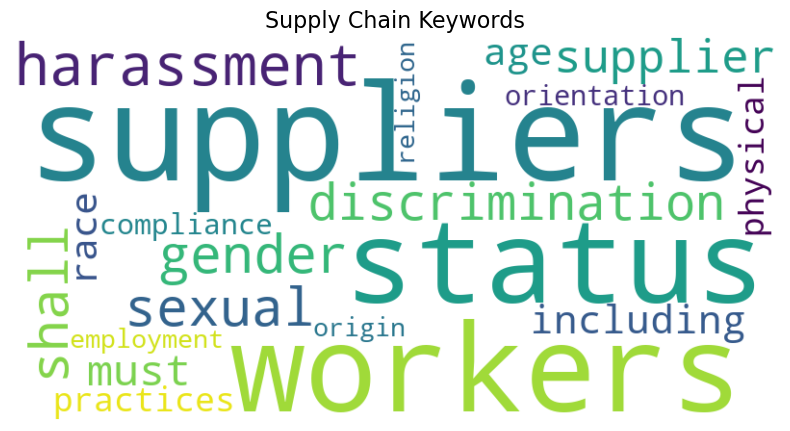

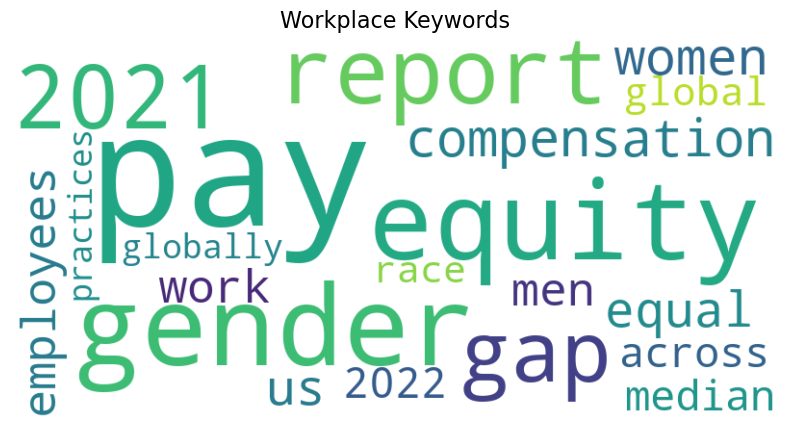

In [140]:
# Wordcloud for supply chain
plot_wordcloud(supply_chain_keywords, "Supply Chain Keywords")

# Wordcloud for workplace
plot_wordcloud(workplace_keywords, "Workplace Keywords")

In [141]:
#  Bar plot visualization
def plot_bar_chart(keyword_dict, title):
    # Sort the keywords by frequency in descending order
    sorted_keywords = sorted(keyword_dict.items(), key=lambda x: x[1], reverse=True)
    keywords = [item[0] for item in sorted_keywords]
    frequencies = [item[1] for item in sorted_keywords]
    plt.figure(figsize=(10, 5))
    plt.barh(keywords, frequencies, color='skyblue')
    plt.title(title, fontsize=16)
    plt.xlabel("Frequency")
    plt.ylabel("Keywords")
    plt.gca().invert_yaxis()
    plt.show()

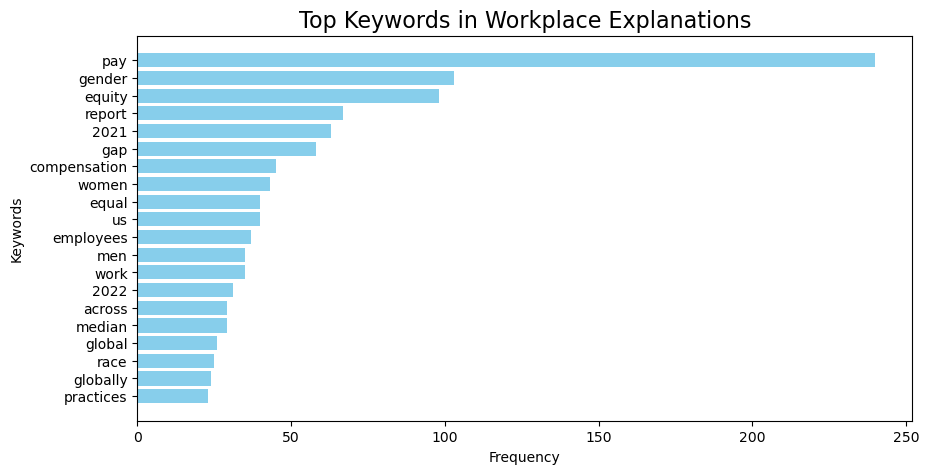

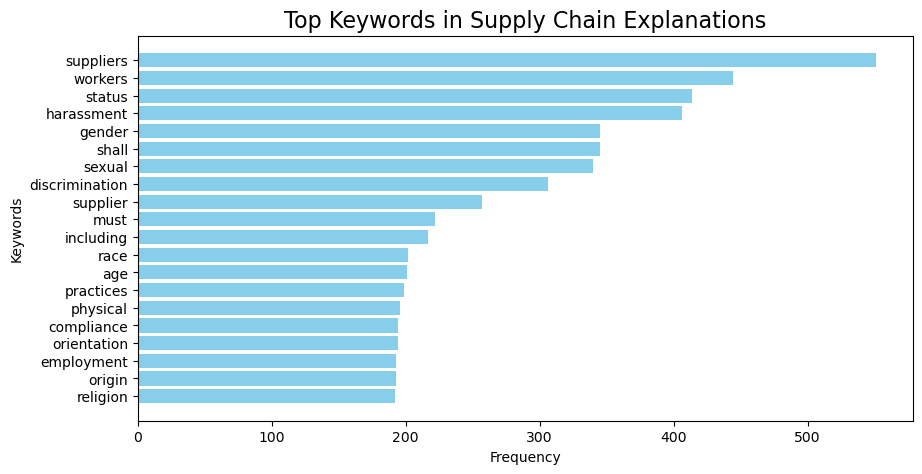

In [142]:
# Bar chart for workplace
plot_bar_chart(workplace_keywords, "Top Keywords in Workplace Explanations")

# Bar chart for supply chain
plot_bar_chart(supply_chain_keywords, "Top Keywords in Supply Chain Explanations")

**Visual Observations**:

The keywords in workplace explanations includes "pay", "compensation", "global" and "equity". In contrast, supply chain explanations highlight terms like "suppliers", "workers", "status" and "compliance".

**Key Insights**:

We can find that workplace explanations mainly focus on policies for accountability and equity. In contrast, supply chain explanations focus on action , highlighting compliance, addressing operational challenges, and resolving gender-related issues. This distinction shows that workplace efforts are primarily policy-driven, while supply chain initiatives prioritize actionable measures.

### Sentiment Analysis: Focus on Violence and Harassment Prevention

To better apply sentiment analysis, we select following variables:

VHP-E01.EA-Evidence: Evidence of the company has publicly available policies in place regarding violence and harassment in the workplace (e.g., zero tolerance policy, safe transport policy, etc.).

We filtered the words 'violence' and 'harassment' to avoid their inherently negative sentiment.

In [143]:
# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [144]:
filtered_df = data[data['VHP-E01.EA-Evidence-has_evidence'] == 1]

# Extract explanation text
combined_text = filtered_df['VHP-E01.EA-Evidence'].fillna('').apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Remove "harassment" and "violence" from combined_text
combined_text = filtered_df['VHP-E01.EA-Evidence'].fillna('').apply(
    lambda x: re.sub(r'\b(harassment|violence)\b', '', x, flags=re.IGNORECASE) if isinstance(x, str) else x
)

In [145]:
# Perform sentiment analysis
def analyze_sentiment(text_data):
    sentiments = []
    for text in text_data:
        if pd.notna(text):
            score = analyzer.polarity_scores(text)
            sentiments.append(score['compound'])  # Compound sentiment score
        else:
            sentiments.append(0)  # Neutral for missing text
    return sentiments

Next, we analyze sentiment for text and categorize them, After that, we visualize the results.

In [146]:
# Analyze sentiment
sentiment_scores = analyze_sentiment(combined_text)

In [147]:
# Categorize sentiment
def categorize_sentiments(sentiment_scores):
    categories = []
    for score in sentiment_scores:
        if score > 0:
            categories.append('Positive')
        elif score < 0:
            categories.append('Negative')
        else:
            categories.append('Neutral')
    return categories

In [148]:
# Categorize sentiment
sentiment_categories = categorize_sentiments(sentiment_scores)

In [149]:
# Visualization
def plot_sentiment_distribution(sentiment_categories, title):
    sentiment_counts = pd.Series(sentiment_categories).value_counts()
    sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'], figsize=(8, 5))
    plt.title(title)
    plt.xlabel('Sentiment Category')
    plt.ylabel('Count')
    plt.show()

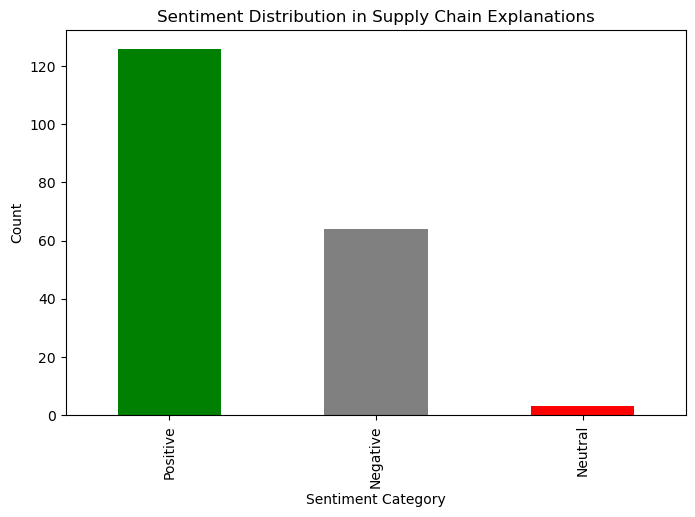

In [150]:
# Visualize results
plot_sentiment_distribution(sentiment_categories, 'Sentiment Distribution in Supply Chain Explanations')

**Visual Observations**:

The sentiment distribution predominantly shows positive entries, with fewer negative and very few neutral sentiments.

**Key Insights**:

The predominance of positive sentiment suggests an emphasis on proactive measures and commitment to addressing sensitive issues constructively. Negative sentiments, while present, may reflect acknowledgment of challenges or areas requiring improvement, indicating transparency. After analysis, we can find that for a heavy topic, such as Violence and Harassment, most companies need to emphasis on responsibility and accountability in the text, and show their positive attitude.

### Topic Distribution Across Industries: Gender-responsive human rights due diligence process

To better prepare for topic modeling, we select following variables:

GDD-A04.EA-Evidence: Evidence of the company discloses what gender-related human rights impacts it has assessed and prioritised as being salient (i.e. most severe and potentially irremediable if not addressed). 

We choose this variable to analyze because we want to learn more about how different industries prioritize and address specific aspects of human rights and supply chain challenges.

We tokenize and filter the data first.

In [186]:
def preprocess_text(text_data):
    # Tokenize the text (splitting into words)
    tokenized_text = word_tokenize(text_data.lower())  # Convert to lowercase to standardize
    
    # Remove punctuation (if necessary)
    tokenized_text = [word for word in tokenized_text if word not in string.punctuation]
    
    # Return the cleaned tokenized text
    return tokenized_text

# Filter data based on evidence
rights_df = data[data['GDD-A04.EA-Evidence-has_evidence'] == 1]

# Group data by 'Industry'
industry_grouped_df = rights_df.groupby('Industry')['GDD-A04.EA-Evidence'].apply(lambda x: ' '.join(x)).reset_index()


# Preprocess text data for each industry
industry_grouped_df['ProcessedText'] = industry_grouped_df['GDD-A04.EA-Evidence'].apply(preprocess_text)

In [187]:
# Join tokenized text into a single string for each row
industry_grouped_df['ProcessedTextStr'] = industry_grouped_df['ProcessedText'].apply(lambda x: ' '.join(x))

Next, we choose the optimal number of topics and run the modeling.

In [ ]:
# Vectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(industry_grouped_df['ProcessedTextStr'])

# Function to compute perplexity
def compute_perplexity(lda_model, X):
    return lda_model.perplexity(X)

# List to store perplexity scores
perplexities = []
topic_range = range(2, 11)  # Try 2 to 10 topics

# Train LDA and compute perplexity for different topic numbers
for n_topics in topic_range:
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=5000)
    lda.fit(X)
    
    # Compute perplexity (lower is better)
    perplexity = compute_perplexity(lda, X)
    perplexities.append(perplexity)

optimal_num_topics = topic_range[np.argmin(perplexities)]

In [193]:
# Train the LDA model with the optimal number of topics
lda = LatentDirichletAllocation(n_components=optimal_num_topics, random_state=5000) 
lda.fit(X)

# Output the topics
for index, topic in enumerate(lda.components_):
    print(f"Topic #{index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])

Topic #0:
['human', 'factory', 'factories', 'conduct', 'trafficking', 'chain', 'supply', 'act', 'webpage', 'forced']
Topic #1:
['rights', 'human', 'risks', 'risk', 'suppliers', 'business', 'report', '2021', 'assessment', 'including']


We using stacked bar chart to analyze the distribution of topics accross industries.

<Figure size 1000x600 with 0 Axes>

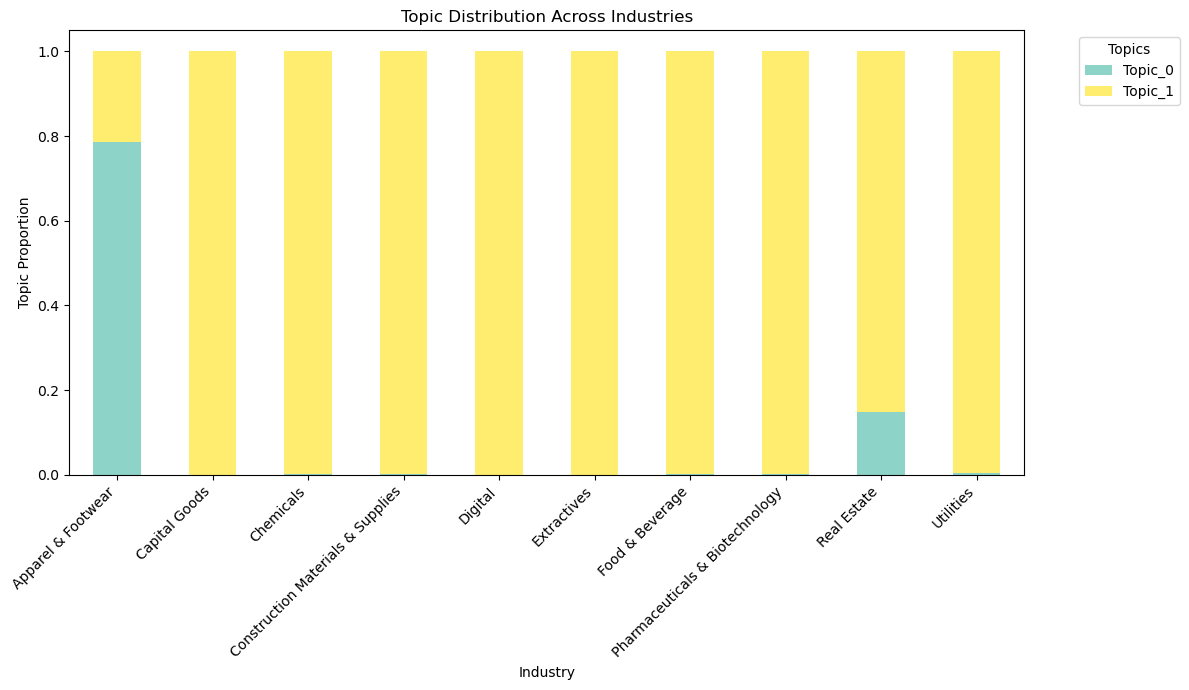

In [199]:
# Get the topic distribution for each document
topic_distribution = lda.transform(X)

# Add the topic distribution to the dataframe (one column per topic)
topic_columns = [f"Topic_{i}" for i in range(optimal_num_topics)]
topic_distribution_df = pd.DataFrame(topic_distribution, columns=topic_columns)

# Ensure industry_grouped_df and topic_distribution_df have the same number of rows
# Reset the index for both DataFrames to ensure they align
industry_grouped_df = industry_grouped_df.reset_index(drop=True)  # Reset index to align
topic_distribution_df = pd.DataFrame(topic_distribution, columns=topic_columns)

# Double-check the number of rows before concatenating
assert len(industry_grouped_df) == len(topic_distribution_df), "Row numbers don't match!"

# Combine the dataframes
df_with_topics = pd.concat([industry_grouped_df, topic_distribution_df], axis=1)

# Aggregate topic distributions by industry
industry_topic_dist = df_with_topics.groupby('Industry')[topic_columns].mean()

# Plot the topic distributions across industries (stacked bar chart)
plt.figure(figsize=(10, 6))
industry_topic_dist.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set3')
plt.title('Topic Distribution Across Industries')
plt.xlabel('Industry')
plt.ylabel('Topic Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Visual Observations**:

Topic #0, related to supply chain issues and human trafficking, is most prevalent in manufacturing, retail, and wholesale industries. Topic #1, focusing on human rights assessments and risk reporting, shows a more balanced distribution across industries, highlighting its relevance in broader corporate governance.

**Key Insights**:

Topic #0, which addresses supply chain issues like forced labor and trafficking, is more significant in industries such as manufacturing and retail, where these issues are more likely to arise. Topic #1, focused on human rights reporting and risk assessment, is more evenly distributed across industries, reflecting the growing importance of human rights evaluation in corporate governance across sectors.

### Keyword Network Analysis: Unveiling the Structure of Grievance Mechanisms

To better prepare for network analysis, we select following variables about grievance mechanisms:

GM-A05.EA-Evidence: Evidence of the company has a gender-responsive mechanism through which employees can report grievances. 

GM-A05.EA-Evidence: Evidence of the company has one or more channel(s)/mechanism(s), or participates in a shared mechanism, accessible to all external individuals and communities who may be adversely impacted by the company (or individuals or organisations acting on their behalf or who are otherwise in a position to be aware of adverse impacts), to raise complaints or concerns.

GM-A05.EC-Evidence: Evidence of the company collects, analyses and monitors sex-disaggregated grievance data (e.g. number of grievances reported, number of grievances remediated).


First, combined evidence columns into a single text column.

In [ ]:
# Filter data for rows with evidence for all three variables
filtered_df = data[
    (data['GM-A05.EA-Evidence-has_evidence'] == 1) |
    (data['GM-A05.EB-Evidence-has_evidence'] == 1) |
    (data['GM-A05.EC-Evidence-has_evidence'] == 1)
][['GM-A05.EA-Evidence', 'GM-A05.EA-Evidence', 'GM-A05.EC-Evidence']]

# Drop rows where all three evidence fields are NaN (no data available for any variable)
filtered_df = filtered_df.dropna(how='all', subset=['GM-A05.EA-Evidence', 'GM-A05.EB-Evidence', 'GM-A05.EC-Evidence'])

Next, computed a co-occurrence matrix by multiplying the term-document matrix with its transpose, and then visualize them.

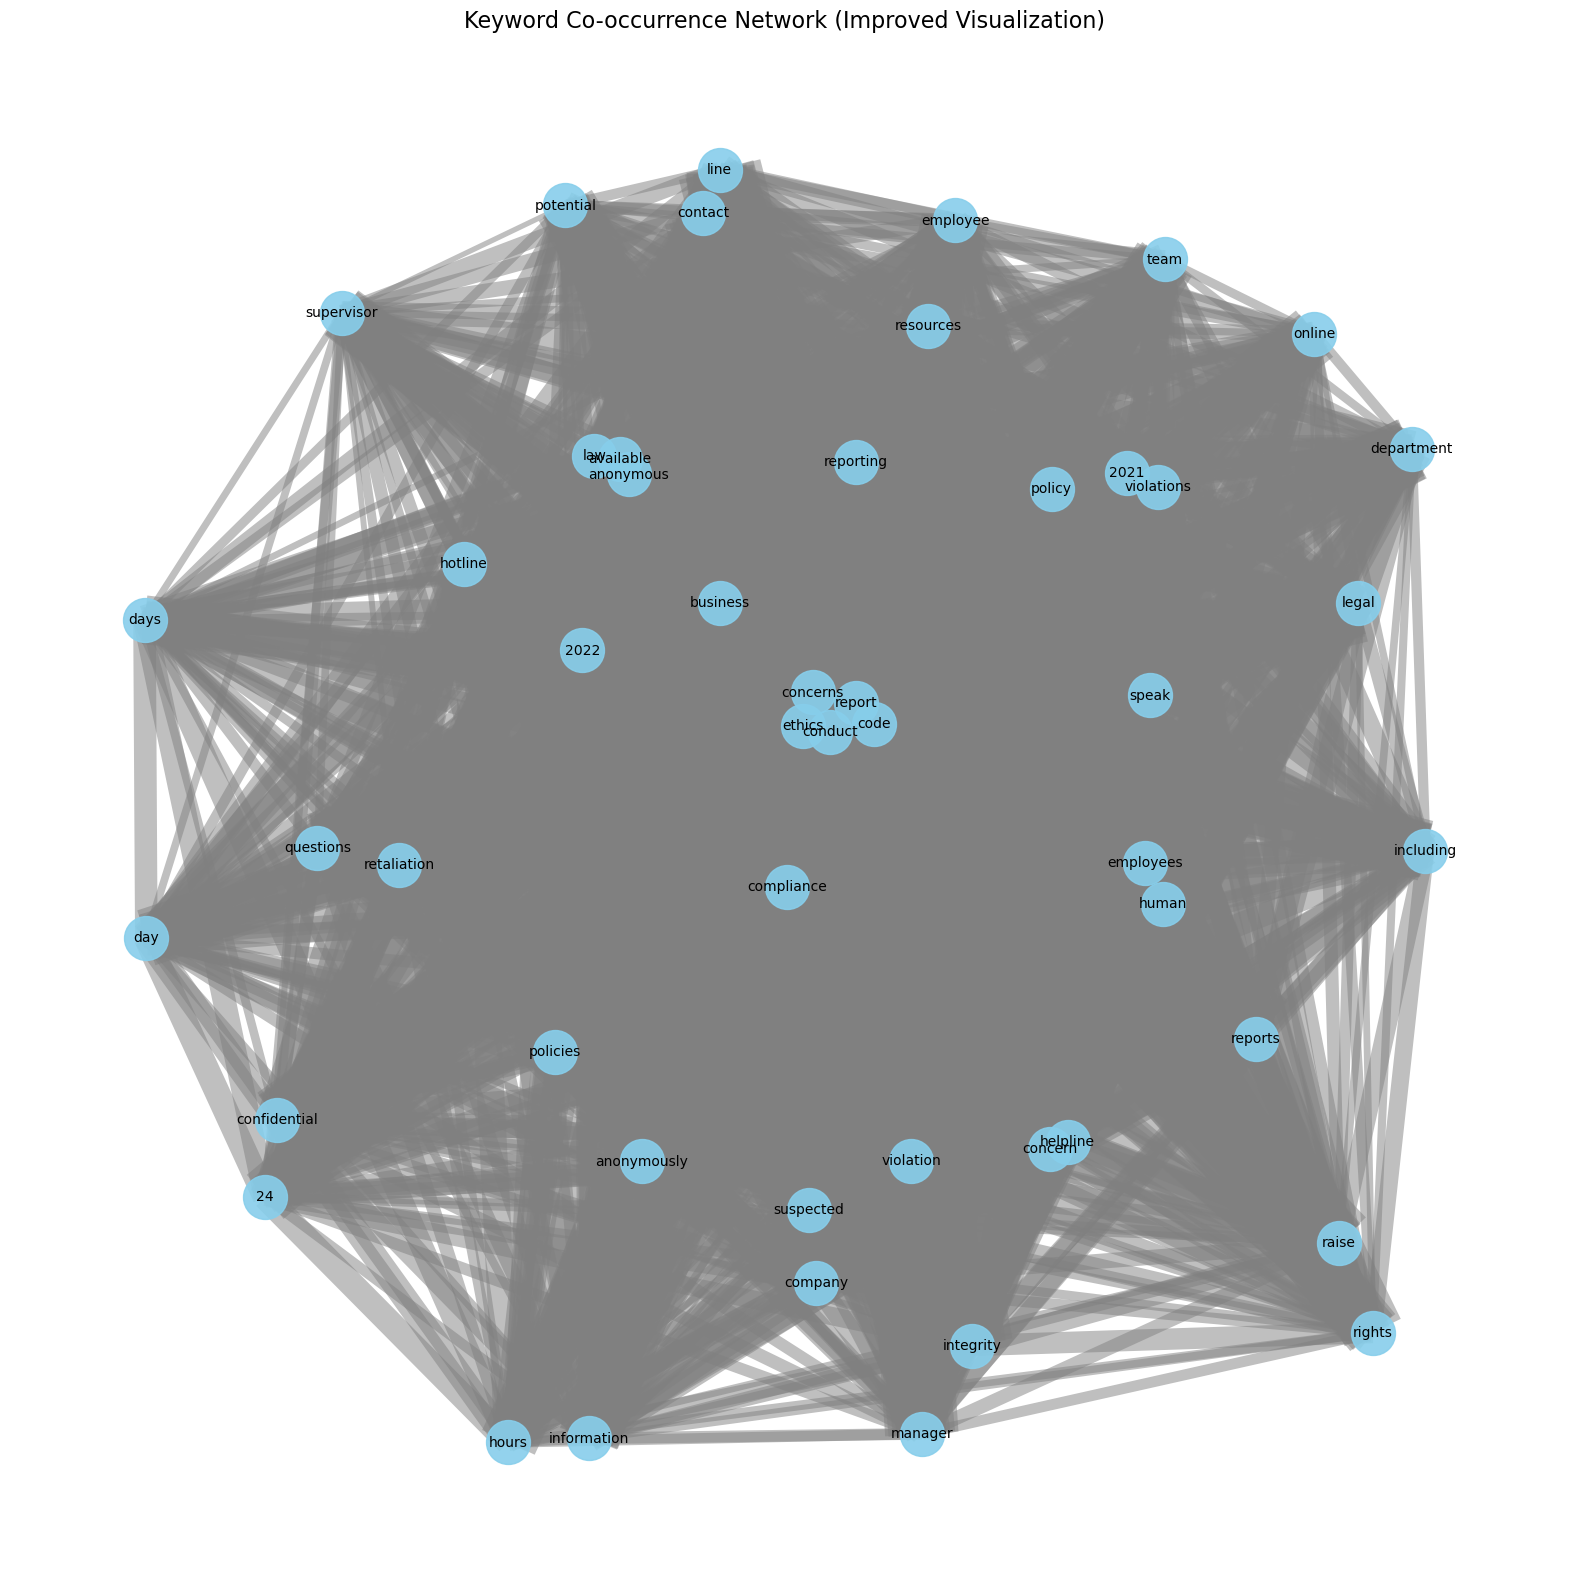

In [135]:
# Combine evidence columns into a single text column
filtered_df['CombinedText'] = filtered_df['GM-A05.EA-Evidence'].fillna('') + ' ' + \
                              filtered_df['GM-A05.EB-Evidence'].fillna('') + ' ' + \
                              filtered_df['GM-A05.EC-Evidence'].fillna('')

# Tokenize and extract keywords using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=50)  # Adjust max_features as needed
X = vectorizer.fit_transform(filtered_df['CombinedText'])

# Get feature names (keywords)
keywords = vectorizer.get_feature_names_out()

# Construct a co-occurrence matrix
cooccurrence_matrix = (X.T @ X).toarray()  # Multiply term-document matrix by its transpose
cooccurrence_df = pd.DataFrame(cooccurrence_matrix, index=keywords, columns=keywords)

# Create a NetworkX graph
G = nx.Graph()

# Add nodes and edges from the co-occurrence matrix
for i, word in enumerate(keywords):
    for j, cooc in enumerate(cooccurrence_matrix[i]):
        if i != j and cooc > 0:  # Exclude self-loops
            G.add_edge(keywords[i], keywords[j], weight=cooc)

# Visualization of the network
plt.figure(figsize=(20, 20))


# Use spring layout with adjusted spacing
pos = nx.spring_layout(G, seed=5000, k=0.2)

# Draw nodes with adjusted size and color
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='skyblue', alpha=0.9)

# Draw edges with transparency based on weight
edges = nx.draw_networkx_edges(
    G, pos, 
    edge_color='gray',
    alpha=0.5, 
    width=[d['weight'] / 20 for (u, v, d) in G.edges(data=True)]
)

# Add labels with adjusted font size
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Add title and adjust layout
plt.title("Keyword Co-occurrence Network (Improved Visualization)", fontsize=16)
plt.axis('off')  # Turn off axis
plt.show()


**Visual Observations**:

The network highlights strong connections between keywords like "complaint," "grievance," "report," and "rights," showing their central role in grievance mechanisms. Terms such as "procedure" and "access" suggest a focus on process and accessibility, while some isolated keywords point to less frequent but relevant topics.

**Key Insights**:

Grievance mechanisms are closely tied to reporting rights violations and ensuring accessible procedures. The emphasis on "procedure" and "access" reflects a priority on usability, fairness and formation, while less frequent terms hint at more specialized concerns or contexts.

### CEO Gender-based Word Frequency Analysis in Gender Strategic Action

We select variable about gender strategic action as follow:

SA-A01.EA-Evidence: Evidence of the company made a public commitment to gender equality and women’s empowerment (e.g. signatory to the UN Women’s Empowerment Principles, or having made another public commitment at CEO level).

CEO Gender: Gender of CEO.

We xompute the frequency of each term for both male and female CEOs, and then normalize the word frequencies to account for different document lengths and biases (e.g., more male CEOs).

In [3]:
strategic_df = data[data['SA-A01.EA-Evidence-has_evidence'] == 1]
df_male_ceo = strategic_df[strategic_df['CEO Gender'] == 'Male']
df_female_ceo = strategic_df[strategic_df['CEO Gender'] == 'Female']
df_male_ceo = df_male_ceo.dropna(subset=['SA-A01.EA-Evidence'])
df_female_ceo = df_female_ceo.dropna(subset=['SA-A01.EA-Evidence'])

In [9]:
# List of words to remove
words_to_remove = ['2021', '2022', 'women', 'gender','2023']

# Use CountVectorizer to extract word frequencies
vectorizer = CountVectorizer(stop_words='english')

# Extract word frequencies for male CEO data
X_male = vectorizer.fit_transform(df_male_ceo['SA-A01.EA-Evidence'])

# Extract word frequencies for female CEO data (using the same vocabulary as male CEO data)
X_female = vectorizer.transform(df_female_ceo['SA-A01.EA-Evidence'])

# Get the list of all words in the vocabulary
words = vectorizer.get_feature_names_out()

# Remove the specified words from the vocabulary
words = [word for word in words if word not in words_to_remove]

# Re-apply the vectorizer on male and female CEO data using the filtered vocabulary
X_male_filtered = X_male[:, [vectorizer.get_feature_names_out().tolist().index(word) for word in words]]
X_female_filtered = X_female[:, [vectorizer.get_feature_names_out().tolist().index(word) for word in words]]

# Calculate the total count of each word in the male CEO documents (filtered vocabulary)
male_word_count = X_male_filtered.sum(axis=0).A1  # Convert the word count matrix to a 1D array

# Calculate the total count of each word in the female CEO documents (filtered vocabulary)
female_word_count = X_female_filtered.sum(axis=0).A1

# Calculate the total word count for each male CEO document
male_doc_lengths = X_male.sum(axis=1).A1  # Total word count for each male CEO document

# Calculate the total word count for each female CEO document
female_doc_lengths = X_female.sum(axis=1).A1  # Total word count for each female CEO document

# Calculate the normalized word frequency ratio for male CEOs
male_word_freq_ratio = male_word_count / male_doc_lengths.sum()

# Calculate the normalized word frequency ratio for female CEOs
female_word_freq_ratio = female_word_count / female_doc_lengths.sum()

# Create a DataFrame to store the word frequencies and ratios for both male and female CEOs
word_frequencies_df = pd.DataFrame({
    'Word': words,
    'Male_Frequency_Ratio': male_word_freq_ratio,
    'Female_Frequency_Ratio': female_word_freq_ratio
})

# Sort the DataFrame by Male_Frequency_Ratio in descending order to see the most frequent words
word_frequencies_df = word_frequencies_df.sort_values(by='Male_Frequency_Ratio', ascending=False)

Next, we visualize them by wordcloud.

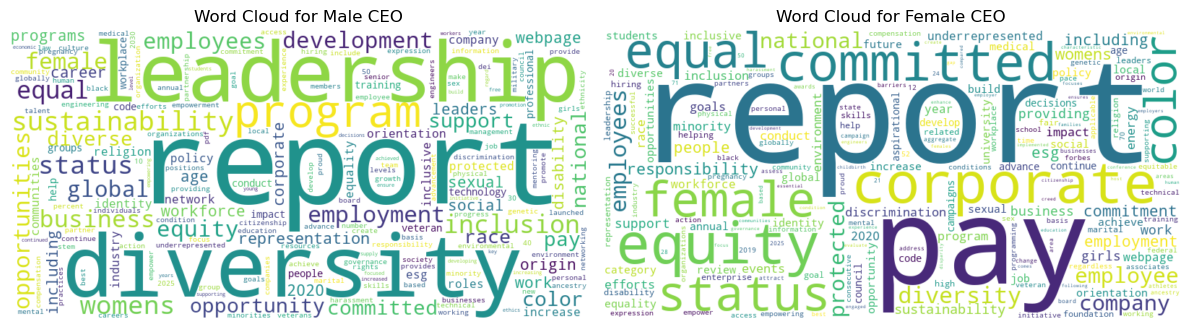

In [10]:
# Generate word clouds by combining word frequencies for male and female CEOs
wordcloud_male = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(words, male_word_count)))
wordcloud_female = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(words, female_word_count)))

# Plot the word clouds
plt.figure(figsize=(12, 6))

# Word cloud for Male CEOs
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_male, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Male CEO')

# Word cloud for Female CEOs
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_female, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Female CEO')

plt.tight_layout()
plt.show()

**Visual Observations**:

The word clouds display the most frequent terms associated with strategic actions from male-led and female-led companies. In the male CEO group, terms like "leadership", "business", "diversity", and "program" appear larger, indicating higher frequencies. In contrast, the female CEO group highlights terms such as "gender", "leadership", "sustainability", and "diversity", suggesting a more gender-focused discourse in their strategic actions.

**Key Insights**:

Male CEOs tend to focus on business-related terms like "leadership", "program", and "business".

Female CEOs, on the other hand, emphasize gender and sustainability-related terms like "gender", "leadership", and "sustainability", showing a more gender-conscious approach.

Both groups highlight "leadership", but male CEOs seem to focus more on business leadership, while female CEOs connect it to diversity and sustainability.


### Analysis of Pay Gap Data Collection Based on CEO Gender

We found that the word "pay" mentioned more in the evidence of strategy in companies which CEO is female, so we want to check that if female company have a better standard of pay gap. So we select variable as follow:

GPG-C01.EB-Assessment: Whether the company collects sex-disaggregated pay data by different pay bands, occupational functions, or other financial benefits or not.

CEO Gender: Gender of CEO.

We first try to clean and transform the GPG-C01.EB-Assessment values into binary categories, and then calculate the percentage of "Met" and "Unmet" for each CEO gender using div(). After that, we analyze the results and draw conclusions about the relationship between CEO gender and the company's ability to meet pay gap data collection standards.

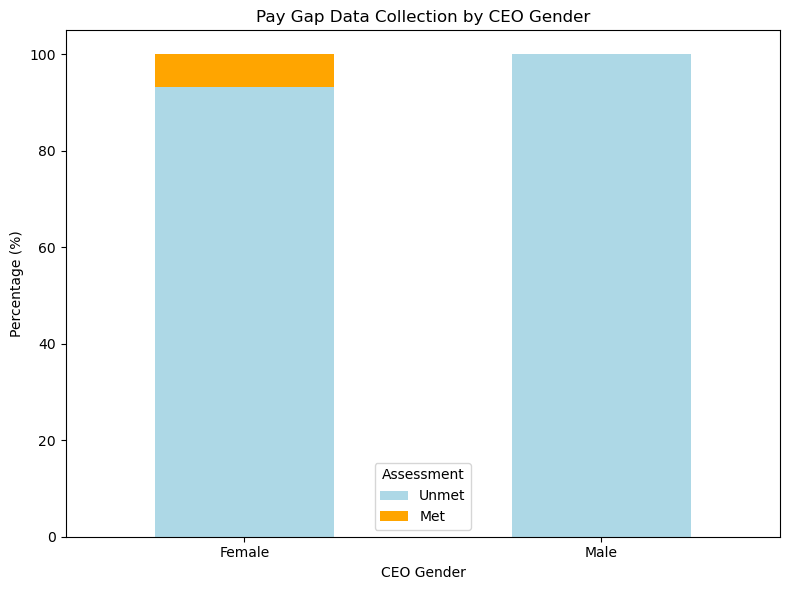

In [ ]:
df = data[['CEO Gender', 'GPG-C01.EB-Assessment']].copy()  # Create a copy to avoid modifying the original DataFrame

# Use .loc to avoid SettingWithCopyWarning
df.loc[:, 'C01.EB_BINARY'] = df['GPG-C01.EB-Assessment'].map({'Met': 1, 'Unmet': 0})

# Create a contingency table (cross-tabulation)
cross_tab = pd.crosstab(df['CEO Gender'], df['C01.EB_BINARY'])

# Calculate the percentage of 'Met' and 'Unmet' for each CEO Gender
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart
cross_tab_percentage.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightblue', 'orange'])

# Add title and labels
plt.title('Pay Gap Data Collection by CEO Gender')
plt.xlabel('CEO Gender')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(['Unmet', 'Met'], title='Assessment')

# Adjust layout to ensure the chart is displayed properly
plt.tight_layout()
plt.show()

**Visual Observations**:

Male CEOs: No companies led by male CEOs do not meet the standards for collecting pay gap data.

Female CEOs: More companies led by female CEOs have met the standards.

**Key Insights**:

Female-led companies are more likely to meet pay gap data collection standards.Male-led companies show a higher proportion of "Unmet," indicating there may be more work needed in these organizations to meet gender equity standards.

# Conclusions and Next Steps

## Summary of EDA Findings

**Text Analysis and Feature Engineering**

As for text data, the exploratory data analysis (EDA) revealed several key trends in gender equality practices across organizations. Workplace-related texts primarily focus on policies for equity and accountability, while supply chain texts emphasize actionable measures like compliance and operational challenges. Sentiment analysis showed a predominance of positive sentiment, highlighting proactive efforts towards gender equality, though negative sentiment pointed to challenges, especially regarding violence and harassment.

Topic modeling indicated that issues like human trafficking were most prevalent in industries such as manufacturing and retail, while human rights assessments were more evenly distributed across sectors. The keyword network analysis revealed the importance of grievance mechanisms, with terms like "complaint" and "rights" being central. Furthermore, the analysis of CEO gender and strategic actions showed that male-led companies focus on business leadership, while female-led companies emphasize gender equality and sustainability in their strategic approaches.

## Implications for Modeling

**Feature Selection:**
The insights from EDA, such as the importance of terms related to gender equality, sustainability, and business leadership, will help guide feature selection for modeling. For instance, terms like "gender", "equity", and "leadership" might be selected as features in a classification model to predict gender-related outcomes.

**Data Transformation:**
Based on the patterns discovered, further data preparation might include transforming textual features into numerical values using techniques like TF-IDF or sentiment scores. Normalization of numerical features (e.g., financial indicators) will also be important for consistency in the modeling phase.